Dear August Posch,
 
This email is regarding your April 6, 2022 public disclosure request. 
 
Staff has identified and gathered data files that are responsive to your request and have advised that there are a few caveats included as follows:
 - Our Light Rail Vehicle (LRV) fleet is only about 30% equipped with APCs, what's provided is just a sample size of the true ridership we receive that we are currently expanding for reporting using an approved statistical method validated by a 3rd party; 
 - the stations listed in our data are dependent on accurate route entry at the beginning of an operator's run from terminus to terminus; 
 - APC units are subject to miscounts that can result in double counts, non-count resets on trip/direction change, and negative number of passengers. They aren't frequent, but they do crop up in datasets provided; and
 - these data sets are from 2021 and 2019 and should be enough to start the model you've described. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data2021 = pd.read_csv('2021_RAW_APC_Data.csv')
data2019 = pd.read_csv('2019_RAW_APC_Data.csv')

In [6]:
data2021.to_csv('2021_RAW_APC_Data.csv.gz', compression='gzip')

In [7]:
data2019.to_csv('2019_RAW_APC_Data.csv.gz', compression='gzip')

In [3]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319102 entries, 0 to 1319101
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   railcar ID         1319102 non-null  int64 
 1   passboarding       1319102 non-null  int64 
 2   passexiting        1319102 non-null  int64 
 3   passwithin         1319102 non-null  int64 
 4   routedone          1319102 non-null  int64 
 5   route finish time  1319102 non-null  object
 6   route start time   1319102 non-null  object
 7   stop arrival time  1319102 non-null  object
 8   station name       1319102 non-null  object
 9   next station       1319102 non-null  object
dtypes: int64(5), object(5)
memory usage: 100.6+ MB


In [4]:
data2019['routedone'].nunique()

86473

In [5]:
data2019['railcar ID'].nunique()

19

Only 19 unique railcar IDs. It would make sense that we had 62, because 19 is 30% of 62.

We CAN have two different railcars arriving at the same stop at the exact same time.

I've seen railcars linked together in 2-car and 4-car formations. I'm not sure if there's any way to tell which cars here were part of 2-car trains and which were part of 4-car trains.

Maybe "railcar" is actually 2 of the things together? So what I see as 4-car is actually 2-car?

Need to ask Michael.

Both old and new trains (traincars?) have 74 seats.

In [6]:
data2019.loc[data2019['station name']=='Rainier',:].head(3)

,railcar ID,passboarding,passexiting,passwithin,routedone,route finish time,route start time,stop arrival time,station name,next station
35,145,0,0,14,31193256,2019-01-01 00:52:45.000,2018-12-31 23:59:45.000,2019-01-01 00:14:17.000,Rainier,Othello
36,106,0,0,4,31189739,2019-01-01 00:52:45.000,2018-12-31 23:59:45.000,2019-01-01 00:14:17.000,Rainier,Othello
57,142,0,0,8,31207045,2019-01-01 00:43:42.000,2018-12-31 23:48:08.000,2019-01-01 00:21:34.000,Rainier,Tukwila


Note: "rides" from the Chicago data would essentially correspond to "passboarding" here.

Station names are funny.

In [7]:
data2019.loc[data2019['station name']=='SeaTac',:]

,railcar ID,passboarding,passexiting,passwithin,routedone,route finish time,route start time,stop arrival time,station name,next station
5,106,0,0,1,31189739,2019-01-01 00:52:45.000,2018-12-31 23:59:45.000,2019-01-01 00:02:24.000,SeaTac,Tukwila
6,145,9,0,13,31193256,2019-01-01 00:52:45.000,2018-12-31 23:59:45.000,2019-01-01 00:02:24.000,SeaTac,Tukwila
88,142,0,1,1,31207045,2019-01-01 00:43:42.000,2018-12-31 23:48:08.000,2019-01-01 00:34:01.000,SeaTac,Angle
89,109,0,1,10,31190894,2019-01-01 00:43:45.000,2018-12-31 23:48:11.000,2019-01-01 00:34:04.000,SeaTac,Angle
120,142,0,0,0,31207079,2019-01-01 01:39:15.000,2019-01-01 00:44:12.000,2019-01-01 00:48:28.000,SeaTac,Tukwila
...,...,...,...,...,...,...,...,...,...,...
1318994,102,40,1,52,36409085,2019-12-31 23:33:31.000,2019-12-31 22:28:09.000,2019-12-31 22:31:36.000,SeaTac,Tukwila
1319009,106,2,2,11,36404744,2019-12-31 23:03:39.000,2019-12-31 21:58:33.000,2019-12-31 22:43:08.000,SeaTac,Angle
1319010,142,1,3,6,36405857,2019-12-31 23:03:56.000,2019-12-31 21:58:50.000,2019-12-31 22:43:26.000,SeaTac,Angle
1319036,105,2,0,11,36414005,2019-12-31 23:12:38.000,2019-12-31 22:18:32.000,2019-12-31 23:02:37.000,SeaTac,Angle


In [8]:
data2019.groupby('station name').count().iloc[:,0]

station name
Angle            85722
Baker            83373
Beacon           83574
Capitol Hill     81210
Columbia         83470
Intl District    80704
Othello          83483
Pioneer          80734
Rainier          83552
SODO             81985
SeaTac           83537
Stadium          81039
Tukwila          83495
UW               81745
University       80698
Westlake         80781
Name: railcar ID, dtype: int64

In [9]:
data2019['station name'].unique()

array(['SODO', 'Othello', 'Intl District', 'SeaTac', 'Stadium', 'UW ',
       'Columbia', 'Tukwila', 'Pioneer', 'Baker', 'University',
       'Capitol Hill ', 'Beacon', 'Westlake', 'Rainier', 'Angle'],
      dtype=object)

Note U-dub is spelled U-W-{space}

Verify with Michael: When the train is arriving at a terminus, the "next station" is listed as the same station. When the train is departing the terminus, there's a new row (/observation/datapoint), and it lists the actual next station as the "next station"

Note: perhaps negative "passwithin" are more likely to occur close to, or at, a terminus, because miscounts can accumulate throughout the day.

Note: We *can* get Chicago-style rides by station by day, if we want that!

Existentialism: Once they install passenger counters, part of my project is moot, right? They could directly pipe the actual passenger count over to an app if they wanted to.
 - I suppose where I come in is the ability to predict the future - i.e. if a prospective rider wants to catch a train in 30 minutes, will it be crowded then? That depends on *both* the number of people currently on the train *as well as* how many people get on and off it at the intervening stops.
 
 Ok, I guess I still have a lot of value to add here.
 
I could also try to predict O-D flows.

In [10]:
data2019.loc[data2019['station name']=='UW ',:]

,railcar ID,passboarding,passexiting,passwithin,routedone,route finish time,route start time,stop arrival time,station name,next station
8,110,0,4,-4,31196490,2019-01-01 00:03:09.000,2018-12-31 23:00:27.000,2019-01-01 00:03:09.000,UW,UW
9,110,6,0,6,31196535,2019-01-01 00:58:53.000,2019-01-01 00:03:39.000,2019-01-01 00:03:39.000,UW,Capitol Hill
45,107,0,3,3,31195397,2019-01-01 00:18:19.000,2018-12-31 23:12:00.000,2019-01-01 00:18:19.000,UW,UW
49,107,2,0,2,31195445,2019-01-01 01:17:22.000,2019-01-01 00:18:49.000,2019-01-01 00:18:49.000,UW,Capitol Hill
82,137,0,14,-6,31192044,2019-01-01 00:31:57.000,2018-12-31 23:27:08.000,2019-01-01 00:31:57.000,UW,UW
...,...,...,...,...,...,...,...,...,...,...
1319049,144,0,21,1,36432366,2019-12-31 23:18:06.000,2019-12-31 22:12:16.000,2019-12-31 23:18:06.000,UW,UW
1319050,141,14,0,14,31199586,2020-01-01 00:16:33.000,2019-12-31 23:18:06.000,2019-12-31 23:18:06.000,UW,Capitol Hill
1319051,144,11,0,11,36432433,2020-01-01 00:16:50.000,2019-12-31 23:18:36.000,2019-12-31 23:18:36.000,UW,Capitol Hill
1319065,102,0,17,1,36409085,2019-12-31 23:33:31.000,2019-12-31 22:28:09.000,2019-12-31 23:33:31.000,UW,UW


In [11]:
data2019[500000 : 500000 + 10]

,railcar ID,passboarding,passexiting,passwithin,routedone,route finish time,route start time,stop arrival time,station name,next station
500000,137,47,0,47,33164603,2019-05-18 11:16:53.000,2019-05-18 10:17:45.000,2019-05-18 10:17:45.000,UW,Capitol Hill
500001,102,17,0,17,33158526,2019-05-18 11:17:06.000,2019-05-18 10:18:01.000,2019-05-18 10:18:01.000,UW,Capitol Hill
500002,143,1,0,20,33162867,2019-05-18 10:43:27.000,2019-05-18 09:50:54.000,2019-05-18 10:19:03.000,Rainier,Tukwila
500003,141,12,19,36,33171379,2019-05-18 11:09:33.000,2019-05-18 10:11:17.000,2019-05-18 10:19:04.000,Westlake,University
500004,105,0,1,31,33168799,2019-05-18 11:03:45.000,2019-05-18 10:05:13.000,2019-05-18 10:19:28.000,Stadium,SODO
500005,144,5,22,29,33166403,2019-05-18 10:35:42.000,2019-05-18 09:35:12.000,2019-05-18 10:19:41.000,Capitol Hill,UW
500006,108,0,3,5,33173542,2019-05-18 10:34:34.000,2019-05-18 09:35:48.000,2019-05-18 10:20:09.000,Tukwila,SeaTac
500007,108,0,3,7,33174669,2019-05-18 10:34:34.000,2019-05-18 09:35:48.000,2019-05-18 10:20:09.000,Tukwila,SeaTac
500008,142,15,5,17,33168324,2019-05-18 11:18:27.000,2019-05-18 10:15:59.000,2019-05-18 10:20:16.000,SeaTac,Tukwila
500009,140,4,2,41,33165430,2019-05-18 10:55:41.000,2019-05-18 09:55:09.000,2019-05-18 10:20:45.000,Baker,Beacon


In [33]:
for col in ['route finish time','route start time','stop arrival time']:
    data2019[col] = pd.to_datetime(data2019[col])

In [34]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319102 entries, 0 to 1319101
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   railcar ID         1319102 non-null  int64         
 1   passboarding       1319102 non-null  int64         
 2   passexiting        1319102 non-null  int64         
 3   passwithin         1319102 non-null  int64         
 4   routedone          1319102 non-null  int64         
 5   route finish time  1319102 non-null  datetime64[ns]
 6   route start time   1319102 non-null  datetime64[ns]
 7   stop arrival time  1319102 non-null  datetime64[ns]
 8   station name       1319102 non-null  object        
 9   next station       1319102 non-null  object        
dtypes: datetime64[ns](3), int64(5), object(2)
memory usage: 100.6+ MB


Goal: get the data into an understandable format.

Take a single day
Take a single railcar ID
 - is it on the same route the entire day?
 - how many railcars are on one route?
 - can we group together all railcars that are in a single train?

Can we group the data into 15-minute chunks?

Can we identify which route each vehicle was on?

Do we have all vehicles of a given train?
If so, we should make a version of the dataset that has vehicles grouped together by train.
 

### Exploratory Data Analysis

Just the year 2019.

In [38]:
sam = data2019.sample(1000, random_state=19)

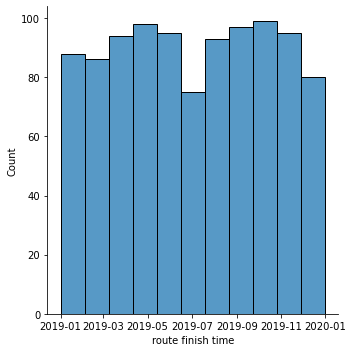

In [42]:
sns.displot(sam, x='route finish time')

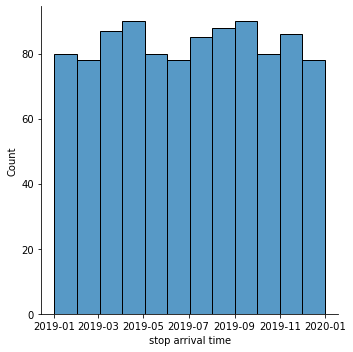

In [44]:
sns.displot(sam, x='stop arrival time', bins = 12)

Roughly equal numbers of arrivals during different months of the year.

Create a by-station by-day dataset. Save it down as a csv.

Aggregate 'passboarding' as rides.

(Later we can create a by-vehicle by-day dataset.)

In [69]:
bsbd = data2019.groupby(['station name',pd.Grouper(key='stop arrival time',freq='D')]
                       ).sum()['passboarding']

In [70]:
bsbd.to_csv('rides_station-day_2019.csv')

In [71]:
bsbd.index

MultiIndex([(   'Angle', '2019-01-01'),
            (   'Angle', '2019-01-02'),
            (   'Angle', '2019-01-03'),
            (   'Angle', '2019-01-04'),
            (   'Angle', '2019-01-05'),
            (   'Angle', '2019-01-06'),
            (   'Angle', '2019-01-07'),
            (   'Angle', '2019-01-08'),
            (   'Angle', '2019-01-09'),
            (   'Angle', '2019-01-10'),
            ...
            ('Westlake', '2019-12-22'),
            ('Westlake', '2019-12-23'),
            ('Westlake', '2019-12-24'),
            ('Westlake', '2019-12-25'),
            ('Westlake', '2019-12-26'),
            ('Westlake', '2019-12-27'),
            ('Westlake', '2019-12-28'),
            ('Westlake', '2019-12-29'),
            ('Westlake', '2019-12-30'),
            ('Westlake', '2019-12-31')],
           names=['station name', 'stop arrival time'], length=5833)

In [75]:
bsbd

station name  stop arrival time
Angle         2019-01-01            395
              2019-01-02           1180
              2019-01-03           1006
              2019-01-04           1165
              2019-01-05            931
                                   ... 
Westlake      2019-12-27           2893
              2019-12-28           1912
              2019-12-29           2590
              2019-12-30           1683
              2019-12-31           1783
Name: passboarding, Length: 5833, dtype: int64

In [76]:
rides2 = bsbd.copy()

In [85]:
angle = rides2['Angle']['2019']



#smaller
#smaller['2019'] # gets down to the data we want

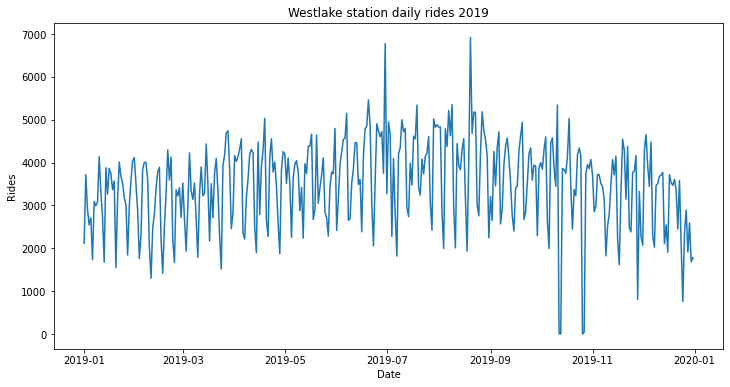

In [101]:
plt.figure(figsize=(12,6))
plt.title('Westlake station daily rides 2019')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(rides2['Westlake'])
plt.show()

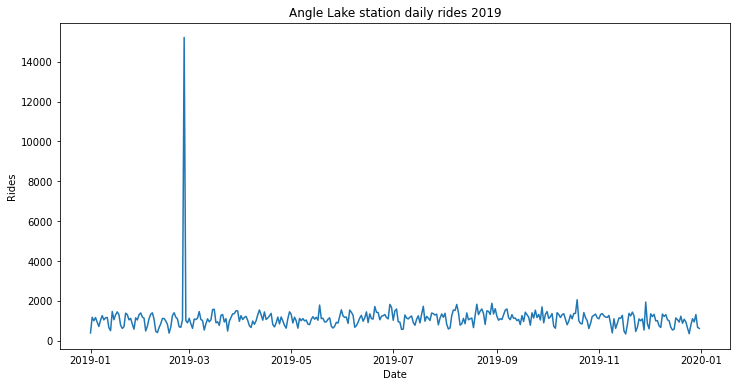

In [90]:
plt.figure(figsize=(12,6))
plt.title('Angle Lake station daily rides 2019')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(rides2['Angle'])
plt.show()

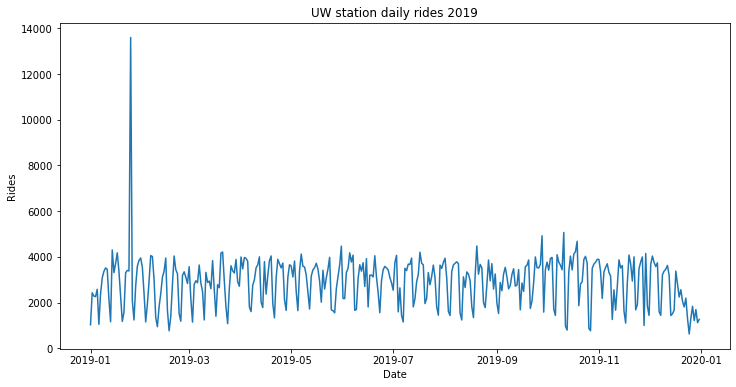

In [91]:
plt.figure(figsize=(12,6))
plt.title('UW station daily rides 2019')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(rides2['UW '])
plt.show()

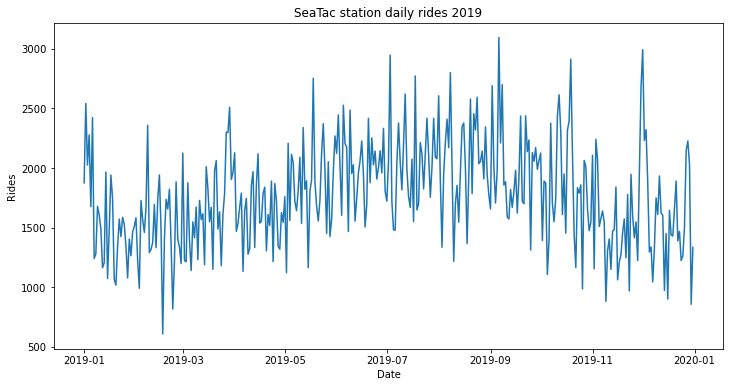

In [100]:
plt.figure(figsize=(12,6))
plt.title('SeaTac station daily rides 2019')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(rides2['SeaTac'])
plt.show()

SeaTac has daily mean around 1500 and pattern is not a commuter pattern. Westlake has mean 3000 and looks kind of commuter-y but a bit different from the Chicago data.

In [102]:
# supervised machine learning
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import statsmodels.api as sm
import warnings 
#warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

In [103]:
datasets = []

# create five-week datasets

for station in ['Westlake','SeaTac']:
    
    rides = rides2[station]
    
    dataset = np.empty((330,36))

    row = 0
    
    for today in pd.date_range('2019-02-05','2019-12-31'):
        date35daysago = today - pd.offsets.Day(35)
        dataset[row] = rides[date35daysago:today]
        row += 1
    
    datasets.append(dataset)
    
# to create two-week datasets,
# we'll simply select certain columns from the five-week datasets

In [104]:
def train_val_readout(model, X_train, y_train, X_val_or_test, y_val_or_test):

    training_preds = model.predict(X_train)
    print('Training set RMSE is', mean_squared_error(y_train, training_preds, squared=False))

    val_preds = model.predict(X_val_or_test)
    print('Val set RMSE is', mean_squared_error(y_val_or_test, val_preds, squared=False))

In [105]:
rmse_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)

def cv_readout(model, X, y):
    X, y = shuffle(X, y, random_state=19)
    print('Performing 5-fold cross-validation...')
    scores = cross_validate(model, X, y, cv=5, scoring=rmse_scorer)
    print('The mean of the RMSEs is', -np.mean(scores['test_score']))
    print('The standard deviation of the RMSEs is', np.std(scores['test_score']))

In [106]:
def readout(model, X_train, y_train, X_val_or_test, y_val_or_test):

    train_val_readout(model, X_train, y_train, X_val_or_test, y_val_or_test)
    
    cv_readout(model, X_train, y_train)

## Westlake 35-day

In [107]:
# split into train/val/test - .6/.2/.2 ratio

d = datasets[0]

X_train, X_purg, y_train, y_purg = train_test_split(d[:,0:35],
                                                    d[:,-1],
                                                    test_size=0.4,
                                                    random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_purg,
                                                    y_purg,
                                                    test_size=0.5,
                                                    random_state=19)

In [108]:
reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01,X_train,y_train,X_val,y_val)

Training set RMSE is 694.8986313780622
Val set RMSE is 786.5205992348799
Performing 5-fold cross-validation...
The mean of the RMSEs is 865.8121062275201
The standard deviation of the RMSEs is 141.02495779839654


In [109]:
forest01 = RandomForestRegressor(n_estimators=500,random_state=19)
forest01.fit(X_train, y_train)

readout(forest01,X_train,y_train,X_val,y_val)

Training set RMSE is 284.6848167009625
Val set RMSE is 735.6820476531635
Performing 5-fold cross-validation...
The mean of the RMSEs is 774.4600107572256
The standard deviation of the RMSEs is 156.18937322120124


In [110]:
forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_val,y_val)

Training set RMSE is 0.0
Val set RMSE is 730.3404422137043
Performing 5-fold cross-validation...
The mean of the RMSEs is 726.2050497639453
The standard deviation of the RMSEs is 155.31379699732


In [111]:
std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Training set RMSE is 518.4128447825584
Val set RMSE is 723.414043245235
Performing 5-fold cross-validation...
The mean of the RMSEs is 759.6379456412357
The standard deviation of the RMSEs is 135.07821234312138


## SeaTac 35-day

In [112]:
# split into train/val/test - .6/.2/.2 ratio

d = datasets[1]

X_train, X_purg, y_train, y_purg = train_test_split(d[:,0:35],
                                                    d[:,-1],
                                                    test_size=0.4,
                                                    random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_purg,
                                                    y_purg,
                                                    test_size=0.5,
                                                    random_state=19)

In [113]:
reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01,X_train,y_train,X_val,y_val)

Training set RMSE is 338.19999500755995
Val set RMSE is 419.4482696001388
Performing 5-fold cross-validation...
The mean of the RMSEs is 426.99624881123236
The standard deviation of the RMSEs is 51.415102043781424


In [114]:
forest01 = RandomForestRegressor(n_estimators=500,random_state=19)
forest01.fit(X_train, y_train)

readout(forest01,X_train,y_train,X_val,y_val)

Training set RMSE is 142.92929138613056
Val set RMSE is 406.62581346483574
Performing 5-fold cross-validation...
The mean of the RMSEs is 392.1668285653704
The standard deviation of the RMSEs is 29.87829038112577


In [115]:
forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_val,y_val)

Training set RMSE is 0.0
Val set RMSE is 415.06223424774174
Performing 5-fold cross-validation...
The mean of the RMSEs is 394.40286233491446
The standard deviation of the RMSEs is 37.10811729253836


In [116]:
std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Training set RMSE is 221.45193866812042
Val set RMSE is 412.0377112212137
Performing 5-fold cross-validation...
The mean of the RMSEs is 383.88908316102703
The standard deviation of the RMSEs is 32.93112220279339


RMSE around 700 for Westlake (from daily mean 3000) RMSE around 400 for SeaTac (from daily mean of 1500).

For Westlake, Random Forest won. For SeaTac, SVM won.

We see similarly close-call contests as to the winning model. However, all these models are just worse than in Chicago study - here, we have 

Next steps - remove a couple outliers, talk to Michael (if 2 cars are always together, which 30% of vehicles -evenly distr?) std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Answers: we have no way of knowing iff two LRVs are together; the 30% of vehicles should be roughly eevenly distributed across stations.

The vehicles in my dataset have 74 seats but can carry 194 people in total.

With that said, I’d be happy to clarify things about the dataset for you.

 

 - Each value in [railcar ID] is a vehicle number that is unique to a single LRV.
 - At this time there is not a value in this data set or any consistent data set that has a valuable way of tracking train lengths.
 - In theory, there should not be a station bias, as any 1 APC-equipped vehicle should be completing trips scheduled from one end of the track to the other. The exception may be stations near the SODO and Stadium stations as that is where the LRVs enter the system from the OMF (Operational Maintenance Facility), but in reality these should balance out as they all originate and terminate there and will need to go past each station regardless.
 - Counting errors can occur, but this is mostly due to how a trip is ended in the system. The system is unaware of which stations are terminus points and relies on the operator/driver to change to a different trip number, this then tells the system to zero out the load counter and increment the [routedone] value. The majority of the time this happens, but sometimes an operator/driver is new or some outside influence distracts them and they do not change the trip number. This causes the [routedone] identifier to not change and therefore contain multiple trips worth of data and to have many more stops allotted to it than are valid for a single trip. A single [routedone] should have a maximum of 16 stops related to it or as of 2022, 19 stops. A [routedone] can have fewer stops as some trips become interrupted for mechanical or other issues that require the LRV to be removed from service. The counting errors can also include the disembarking of personnel that were present and inside of the LRV before and after the trip number is changed, leading to possible negative values in the [passwithin] column when those personnel disembark during normal service.
 - So, to answer your final questions specifically, [routedone] is a unique ID for a full trip and can be used to associate which stops were in the same trip, as well as which LRVs may have been part of the same train, as they would share a [routedone] ID.
 

Let me know if you have any further questions 👍

Get more types of data

### Explore distribution of passwithin

Across stations  
Across times of day
(Across days of week)

In [119]:
data2019.shape

(1319102, 10)

In [120]:
sam.shape

(1000, 10)

In [123]:
N = data2019.shape[0]

In [131]:
# look at outliers
toomany = data2019[data2019['passwithin']>200]

negative = data2019[data2019['passwithin']<0]

underneg5 = data2019[data2019['passwithin']<-5]

In [132]:
print('>200 happens', toomany.shape[0], 'times.')
print('<0 happens', negative.shape[0], 'times.')
print('<-5 happens', underneg5.shape[0], 'times.')

>200 happens 1515 times.
<0 happens 41933 times.
<-5 happens 11701 times.


In [136]:
print('>200 happens', toomany.shape[0]/N, 'of the times.')
print('<0 happens', negative.shape[0]/N, 'of the times.')
print('<-5 happens', underneg5.shape[0]/N, 'of the times.')

>200 happens 0.0011485086066126804 of the times.
<0 happens 0.031789050429762065 of the times.
<-5 happens 0.008870428518795362 of the times.


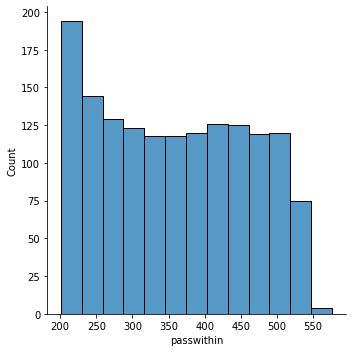

In [127]:
sns.displot(toomany, x='passwithin')

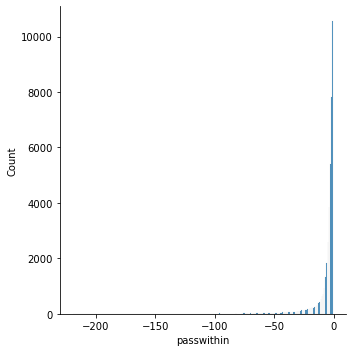

In [129]:
sns.displot(negative, x='passwithin')

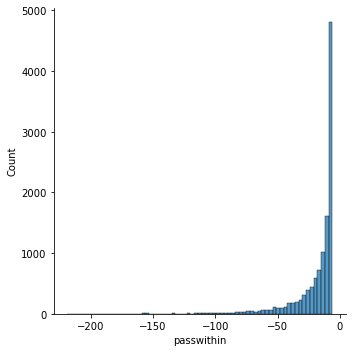

In [134]:
sns.displot(underneg5, x='passwithin', binwidth = 3)

The above is not what I expected for >200. A relatively uniform distribution.

I don't believe that there were 500 people in the same LRV. I do believe there could have been 200 in the same LRV. But maybe there were actually 180 people and there were some counting errors?

I think the histogram of negatives makes more sense, it was much more what I was expecting.

Idea: Determine if most of these observations happened when the counter wasn't reset.


Method:
- sort by routedone and by stop arrival time
- index or number the rows

In [139]:
# First, just see how many rows are in each routedone
rtd = data2019.groupby('routedone').count()['railcar ID']

In [143]:
rtd.name = 'count'

In [144]:
rtd.head()

routedone
31187319     8
31187387    16
31187455    16
31187529    16
31187581    17
Name: count, dtype: int64

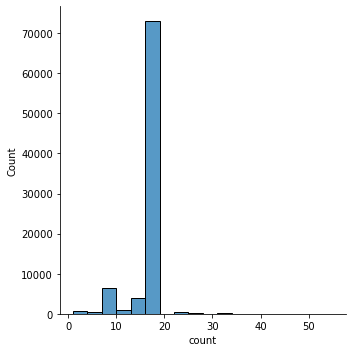

In [145]:
sns.displot(rtd)

In [146]:
N_rtd = rtd.shape[0]

In [149]:
overmuch = rtd[rtd>20]

In [153]:
rtd

routedone
31187319     8
31187387    16
31187455    16
31187529    16
31187581    17
            ..
36455820    16
36455881    16
36455937    16
36455989    16
36456052    16
Name: count, Length: 86473, dtype: int64

In [152]:
overmuch

routedone
31217745    32
31218550    25
31219352    25
31220332    32
31230039    25
            ..
36356180    24
36358297    32
36371429    24
36380509    31
36407734    25
Name: count, Length: 870, dtype: int64

In [151]:
print('We see', overmuch.shape[0],
      'routedones where the APC was not reset. This is',
      overmuch.shape[0]/N_rtd ,'of all routedones in our dataset.')

We see 870 routedones where the APC was not reset. This is 0.010060943878436044 of all routedones in our dataset.


OK, so 1% of routedones are where the APC was not reset. Let's try removing all these routedones from our dataset.

In [158]:
df01 = data2019[~data2019['routedone'].isin(overmuch.index)]

In [159]:
df01.shape

(1296415, 10)

In [161]:
df_descriptions = {'data2019':'The original dataset.',
                'df01':'The original dataset but filtered so it has no trips where the APC was left on too long.'}

In [162]:
df_descriptions['df01']

'The original dataset but filtered so it has no trips where the APC was left on too long.'

In [160]:
print('After filtering, we have', df01.shape[0] / data2019.shape[0], 'of the rows we started with.')

After filtering, we have 0.9828011783774113 of the rows we started with.


### Re-analyze the outliers using the filtered dataset

In [163]:
N = df01.shape[0]

In [164]:
# look at outliers
toomany = df01[df01['passwithin']>200]

negative = df01[df01['passwithin']<0]

underneg5 = df01[df01['passwithin']<-5]

In [165]:
print('>200 happens', toomany.shape[0], 'times.')
print('<0 happens', negative.shape[0], 'times.')
print('<-5 happens', underneg5.shape[0], 'times.')

>200 happens 1478 times.
<0 happens 39842 times.
<-5 happens 10822 times.


In [166]:
print('>200 happens', toomany.shape[0]/N, 'of the times.')
print('<0 happens', negative.shape[0]/N, 'of the times.')
print('<-5 happens', underneg5.shape[0]/N, 'of the times.')

>200 happens 0.0011400670310047322 of the times.
<0 happens 0.03073244292915463 of the times.
<-5 happens 0.008347635595083365 of the times.


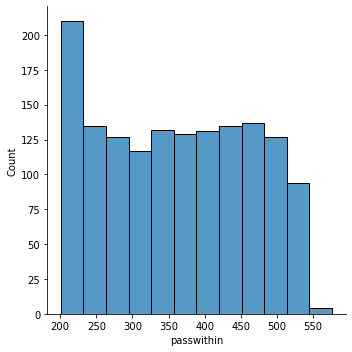

In [167]:
sns.displot(toomany, x='passwithin')

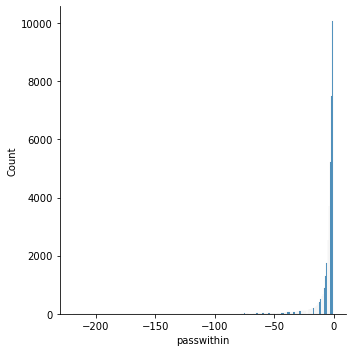

In [168]:
sns.displot(negative, x='passwithin')

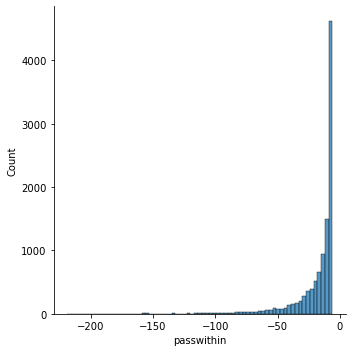

In [169]:
sns.displot(underneg5, x='passwithin', binwidth = 3)

Okay... so, doing the filtering didn't change our outlier rates, nor did filtering change our outlier distributions.

Therefore, drivers leaving the APCs running doesn't seem to be the cause of our outliers.

Puzzling.

Why else could we be seeing these outliers?

 - check by station
 - check by day

Check that if I do the groupby routedone on the filtered dataset, that I get no 20+ stop routes.

In [170]:
# First, just see how many rows are in each routedone
rtd = df01.groupby('routedone').count()['railcar ID']

In [171]:
rtd.name = 'count'

In [172]:
rtd.head()

routedone
31187319     8
31187387    16
31187455    16
31187529    16
31187581    17
Name: count, dtype: int64

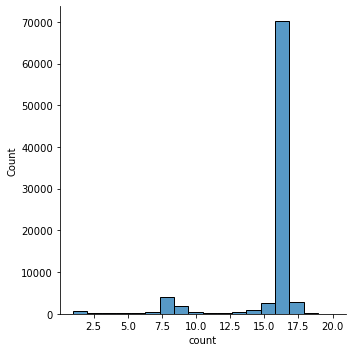

In [173]:
sns.displot(rtd)

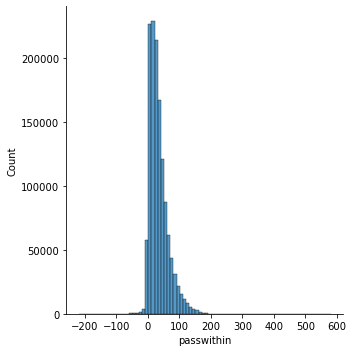

In [177]:
sns.displot(data2019,x='passwithin', binwidth=10)

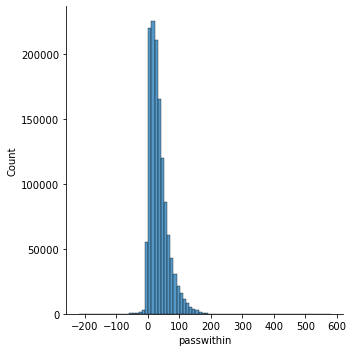

In [176]:
sns.displot(df01,x='passwithin', binwidth=10)

sns.displot(df01,x='passwithin', binwidth=10)

The upshot: >200 and <-5 each happen less than 1% of the time. Values between -5 and 0 happen 3% of the time, but these happen for usual reasons - could be personnel that started inside the train when the APC got reset, who left the train before it was reset again.

The fact that I removed cases of the APC getting left on didn't change the passwithin distribution (importantly, its outliers still follow the same distr). However, it's still good that I filtered like that, given that we have reason to believe there may be innacurate data past the missed reset time (*do I really believe this?*) -- Coule data be more accurate when the APC gets left on???

Some questions (7/3):

1. From the "help the agency" strategy perspective, let's look at past crowding. Under what conditions does crowding tend to happen? (Day of week, station). How often are all the seats full?
 - This information is also nice for riders to know.
  
  
2. From the "help the agency" tactical perspective, we can't help right now. According to Michael, the agency is not ready for that.

3. From the "help the rider" perspective, let's try to predict crowding 30 minutes ahead.
 - Model architecture 1: Take passwithin of the unarrived vehicle, predict net passengers at each intervening station, and add them up.
 - Model architecture 2: Use Extra Trees. Some of the input variables are: the train's current passwithin, day of week, historical amounts 
 
 
Notes: We can investigate Q1, crowding distribution, at the same time as we investigate outlier distribution. Also, while we're looking at passwithin, let's also look at passboarding.

Note: in terms of cleaning the dataset, we can't do much better than we've already done. Therefore, as I'm making models, I'm going to try training them with the existing dataset (df01) as well as with a culled version (df02 - no super-negatives and no super-positives).

Problem: What if we need to predict the crowd level of the vehicle *without* having real-time passwithin?
 - I may be unlikely (ask Michael) to get real-time passwithin from Sound Transit.
 - I coud compare the best model that uses real-time passwithin versus the best model that doesn't use real-time passwithin.

Problem: How do we identify the correct vehicle that will arrive in 26 minutes?

7/4 priorities:
- understand historical distribution (in 2019) of crowded/not-crowded and outliers.
  - I declare >74 means Crowded and >134 means Supercrowded and >194 means Capacity.
  - Outliers will be UnderNeg5, NegAFew, Over250
  - create a new column for each 
  
  -  extract different kinds of time (TOD, DOW, Date)

### Using data2019

In [178]:
df = data2019

In [184]:
df['Crowded'] = df['passwithin']>74
df['Supercrowded'] = df['passwithin']>134
df['Capacity'] = df['passwithin']>194
df['UnderNeg5'] = df['passwithin']<-5
df['NegAFew'] = df['passwithin'].between(-5,-1)
df['Over250'] = df['passwithin']>250

In [196]:
N = df.shape[0]

for col in list(df.columns)[-6:]:
    print(np.round(sum(df[col])/N, 3), 'of observations are', col)

0.098 of observations are Crowded
0.011 of observations are Supercrowded
0.001 of observations are Capacity
0.009 of observations are UnderNeg5
0.023 of observations are NegAFew
0.001 of observations are Over250


### Using df01

In [200]:
df = df01

In [201]:
N = df.shape[0]

for col in list(df.columns)[-6:]:
    print(np.round(sum(df[col])/N, 3), 'of observations are', col)

0.099 of observations are Crowded
0.011 of observations are Supercrowded
0.001 of observations are Capacity
0.008 of observations are UnderNeg5
0.022 of observations are NegAFew
0.001 of observations are Over250


### Create columns for different kinds of time

In [202]:
df = data2019

In [232]:
df['TOD'] = df['stop arrival time'].dt.time
df['DOW'] = df['stop arrival time'].dt.dayofweek # 0 is Monday, 6 is Sunday
df['DOW_name'] = df['stop arrival time'].dt.day_name
df['Date'] = df['stop arrival time'].dt.date

In [211]:
sam = data2019.sample(10000, random_state=19)

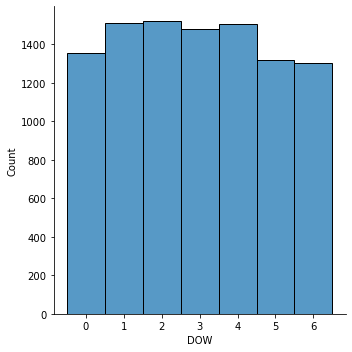

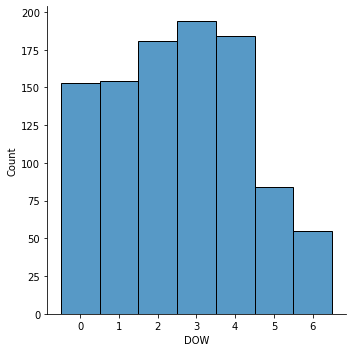

In [262]:
# distribution of DOW overall
sns.displot(sam, x='DOW', discrete=True)
sns.displot(sam[sam['Crowded']], x='DOW', discrete=True)

Crowded happens more often on weekdays, with Thursday having the most Crowded. Thed distribution of Crowded observations is significantly different than the distribution of all observations.

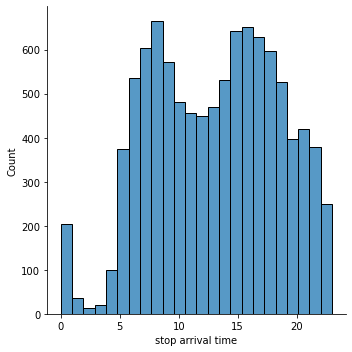

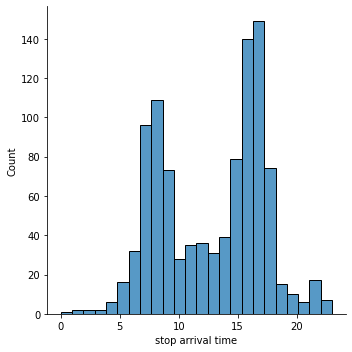

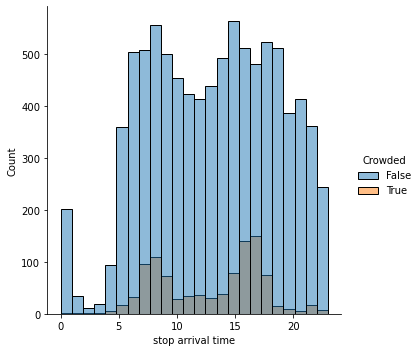

In [239]:
# distribution of TOD overall
sns.displot(x=sam.loc[:,'stop arrival time'].dt.hour, bins=24)
sns.displot(x=sam.loc[sam['Crowded'],'stop arrival time'].dt.hour, bins=24)
sns.displot(x=sam['stop arrival time'].dt.hour, hue=sam['Crowded'],  bins=24)

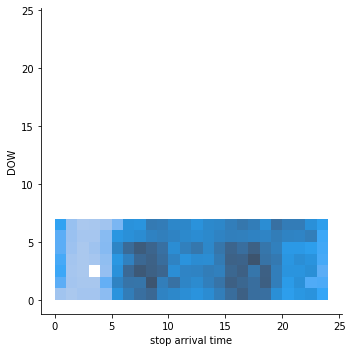

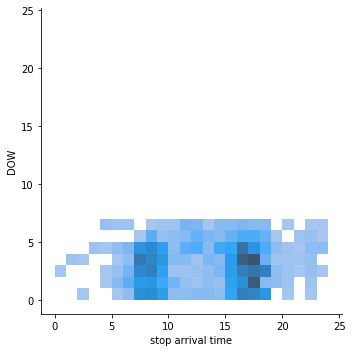

In [281]:
# distribution TOD and DOW
sns.displot(x=sam.loc[:,'stop arrival time'].dt.hour, y=sam.loc[:,'DOW'],
           binwidth=1, binrange=[0,24])
sns.displot(x=sam.loc[sam['Crowded'],'stop arrival time'].dt.hour, y=sam.loc[sam['Crowded'],'DOW'],
           binwidth=1, binrange=[0,24])

* Crowded distribution by TOD and DOW *


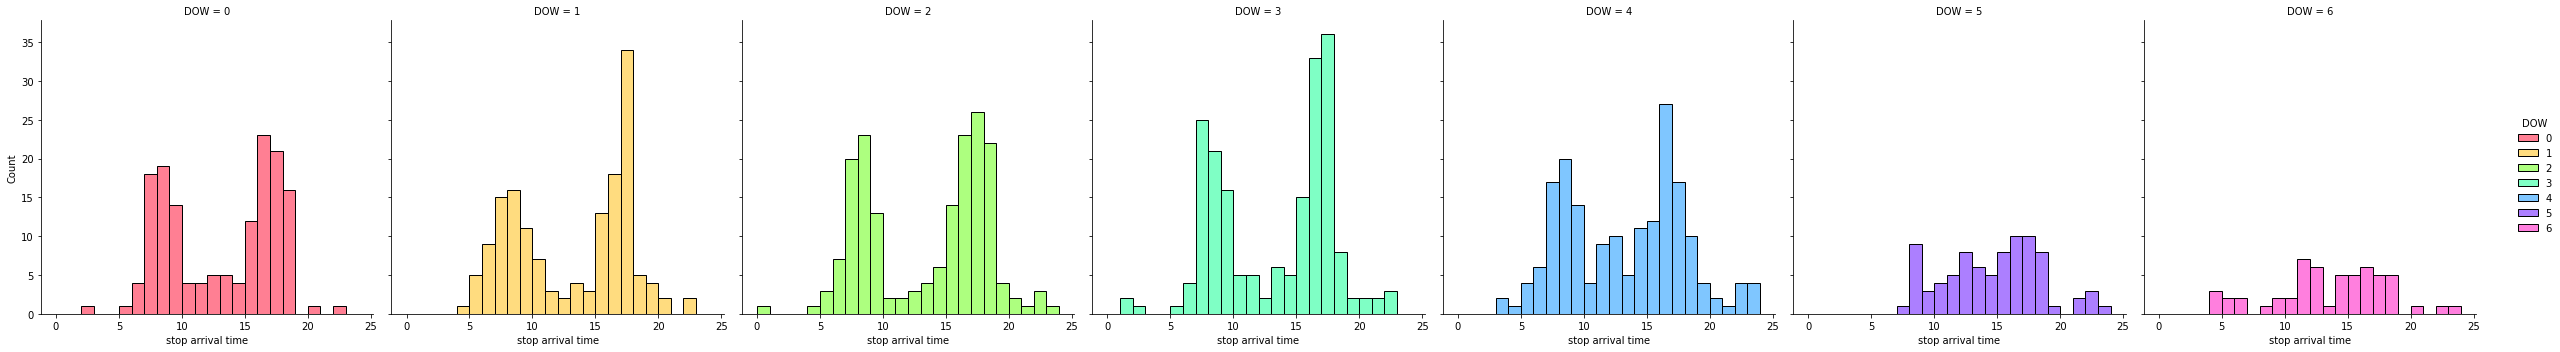

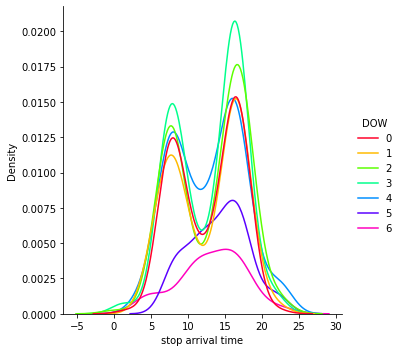

In [280]:
print('* Crowded distribution by TOD and DOW *')
sns.displot(x=sam.loc[sam['Crowded'],'stop arrival time'].dt.hour, col=sam.loc[sam['Crowded'],'DOW'],
            binwidth=1, binrange=[0,24], hue=sam.loc[sam['Crowded'],'DOW'], palette='gist_rainbow')
sns.displot(x=sam.loc[sam['Crowded'],'stop arrival time'].dt.hour, hue=sam.loc[sam['Crowded'],'DOW'],
            kind='kde', palette='gist_rainbow')

Looks like Thursday evenings are most likely to be crowded. We see Wednesday evenings are 2nd-most likely to be crowded.
 - My guess: Weds and Thurs are least likely to be commuter vacations, but they also get some people going out for entertainment.

Fridays have more Crowded observations midday, 

By evening we mean 4-6pm. 

Note Crowded comes from passwithin. Crowded is not quite the same thing as ridership. One person riding 10 stops versus Two people riding 1 stop. The former usually causes more Crowding, whereas the latter is clearly more ridership.

Here's the same plot with Supercrowded:

* Supercrowded distribution by TOD and DOW *


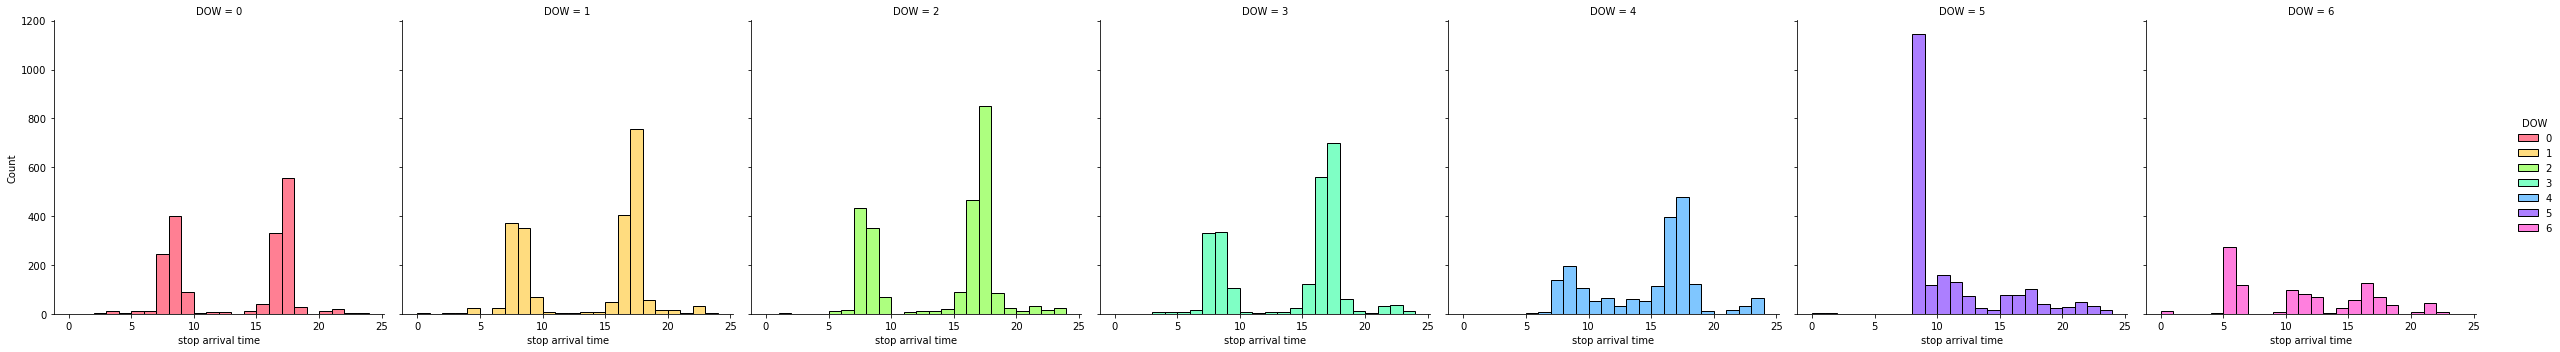

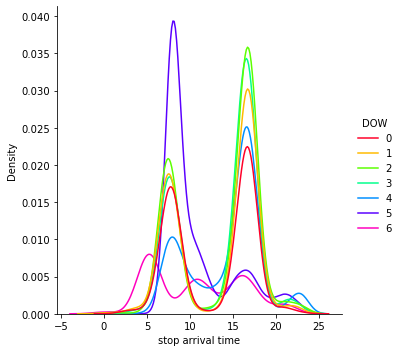

In [279]:
# use all data instead of just sam to get enough N
print('* Supercrowded distribution by TOD and DOW *')
p = sns.displot(x=df.loc[df['Supercrowded'],'stop arrival time'].dt.hour, col=df.loc[df['Supercrowded'],'DOW'],
            binwidth=1, binrange=[0,24], hue=df.loc[df['Supercrowded'],'DOW'], palette='gist_rainbow')
#p.fig.subplots_adjust(top=0.9)
#p.fig.suptitle('Supercrowded')
sns.displot(x=df.loc[df['Supercrowded'],'stop arrival time'].dt.hour, hue=df.loc[df['Supercrowded'],'DOW'],
            kind='kde', palette='gist_rainbow')

Now *this* is interesting. Supercrowded happens most on Saturday mornings, between 8am and 9am.
 - My guess: this is 10am football games. (Will find out for sure when I parse by time of year)
 
 Also some weekday evenings for Supercrowded, especially Weds and Thurs.
 - My guess: Weds and Thurs are least likely to be commuter vacations, but they also get some people going out for entertainment. (Same guess as with crowded for these)

In [292]:
df['AllTrue'] = True

C:\Users\August\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


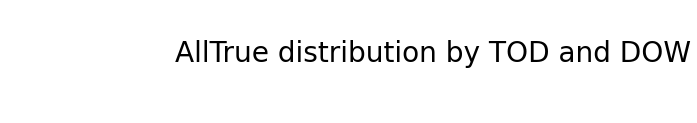

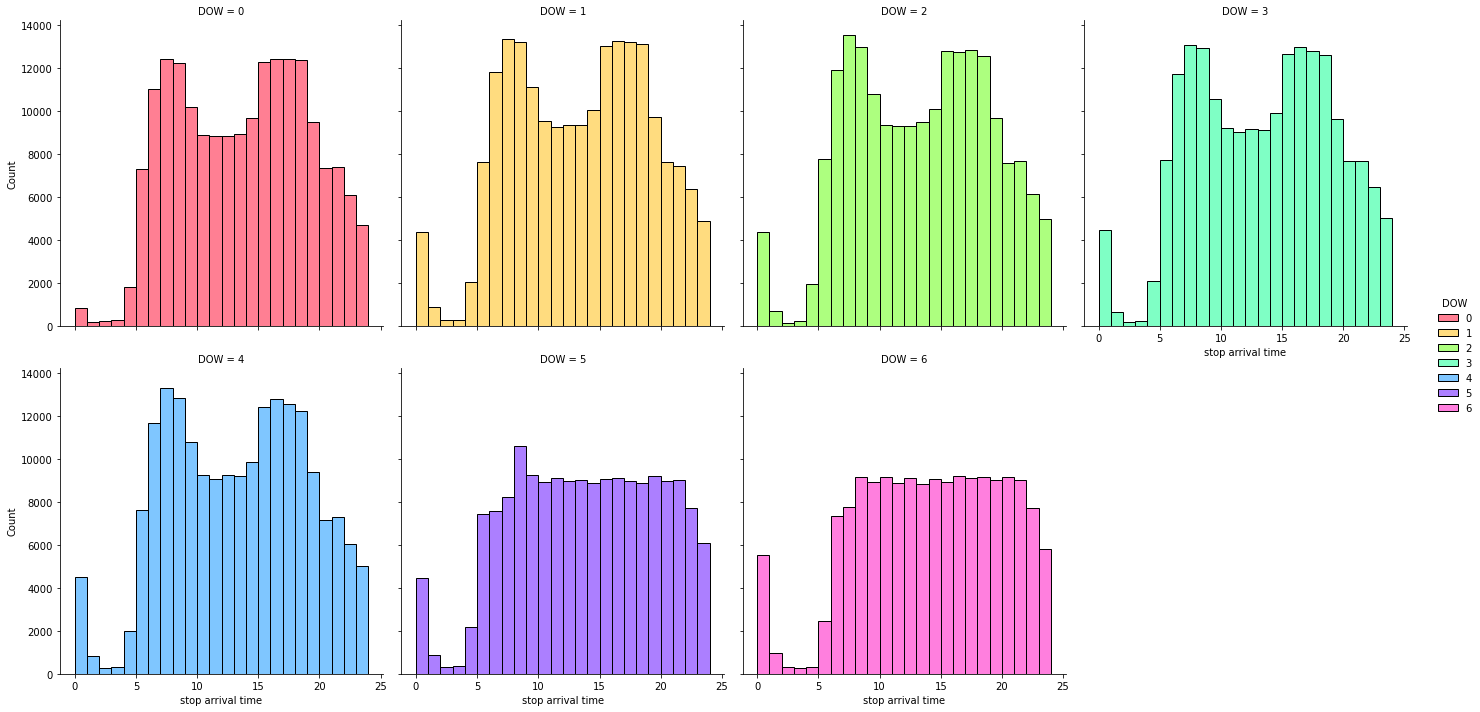

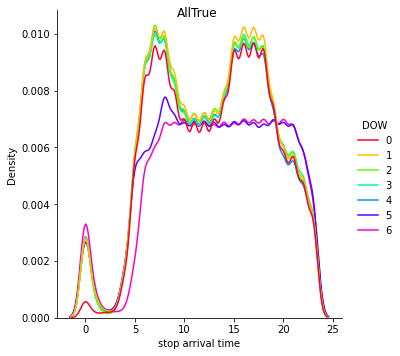

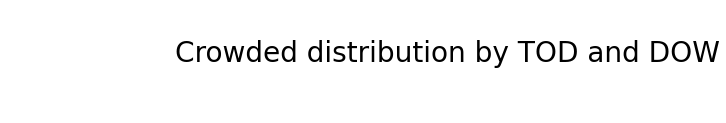

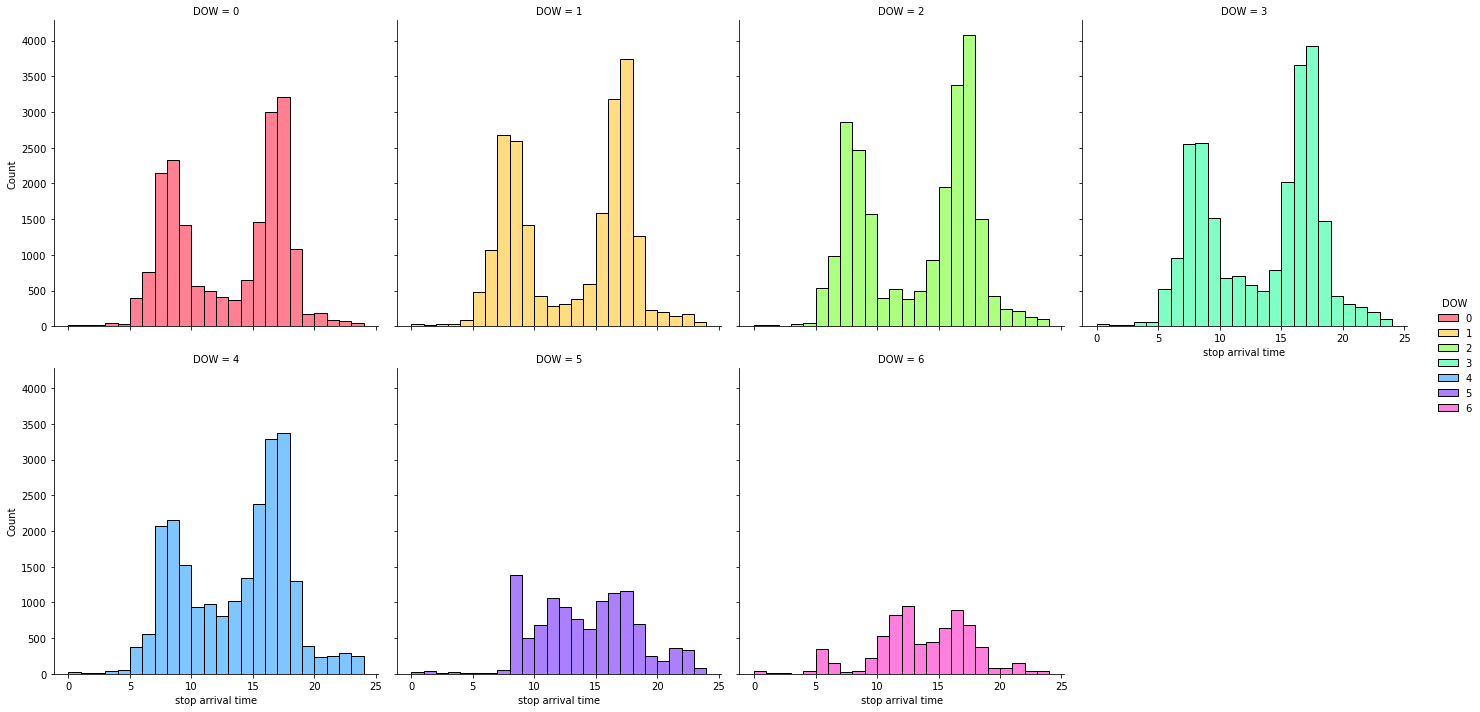

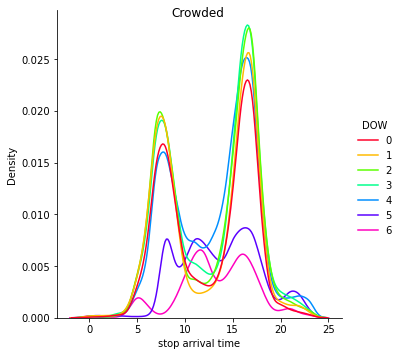

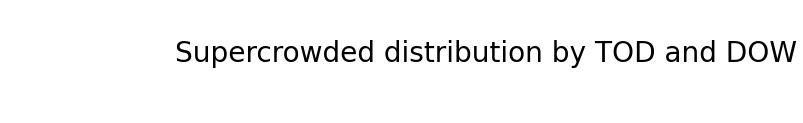

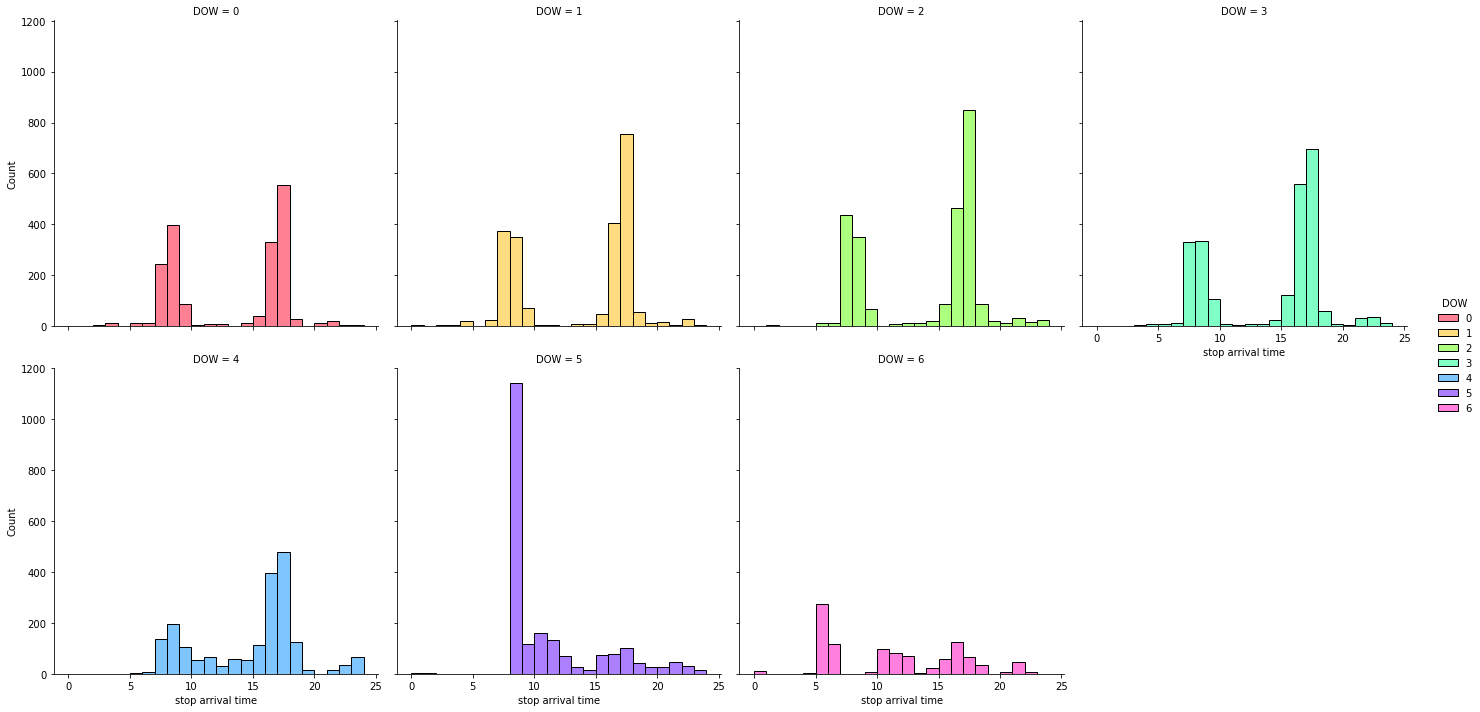

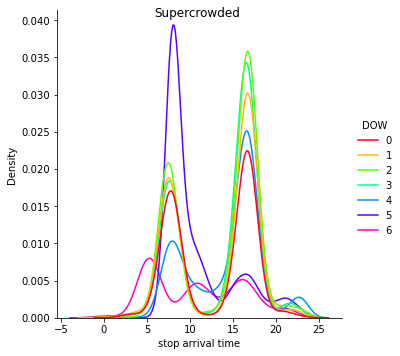

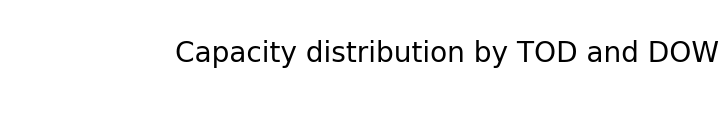

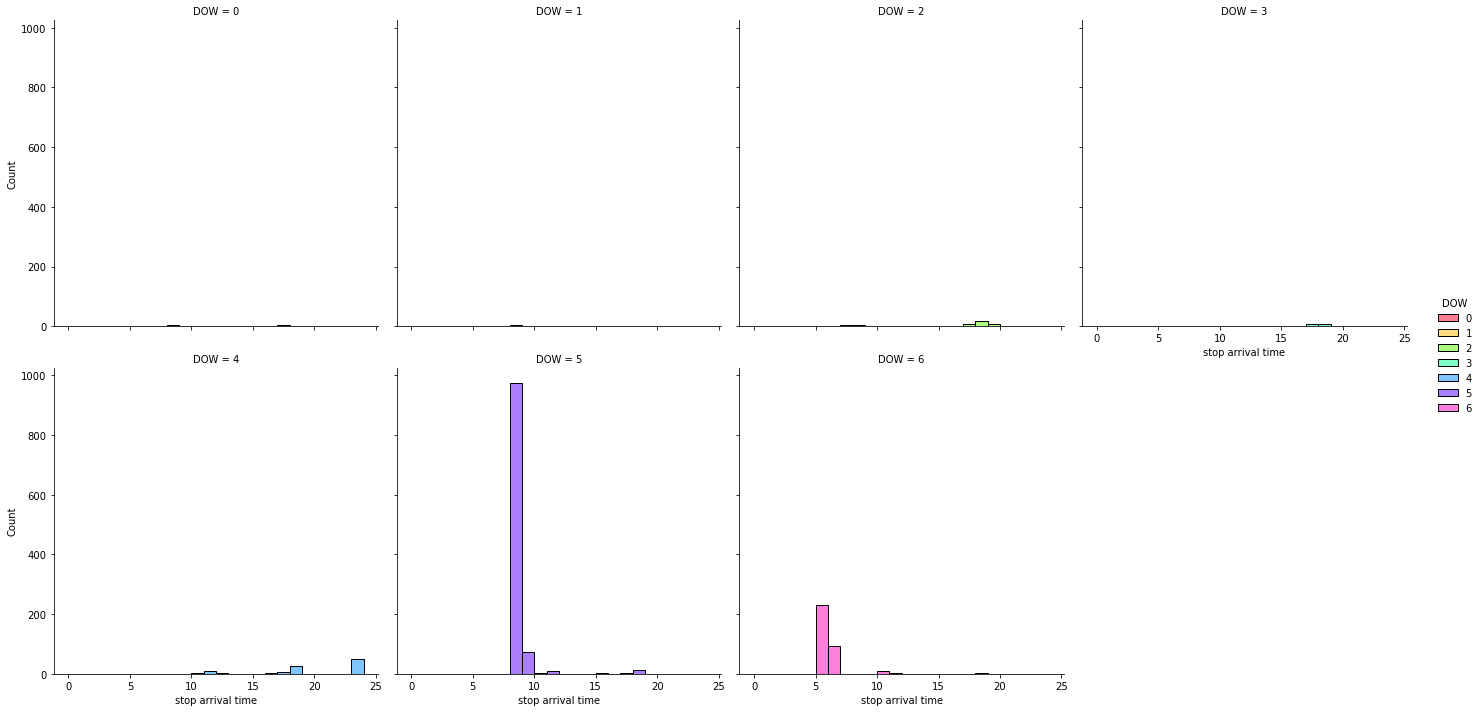

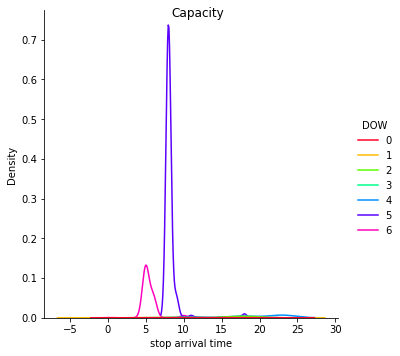

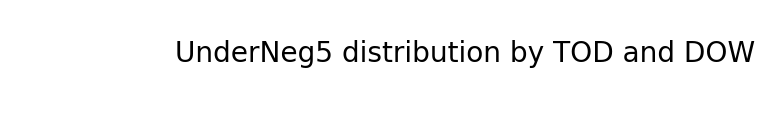

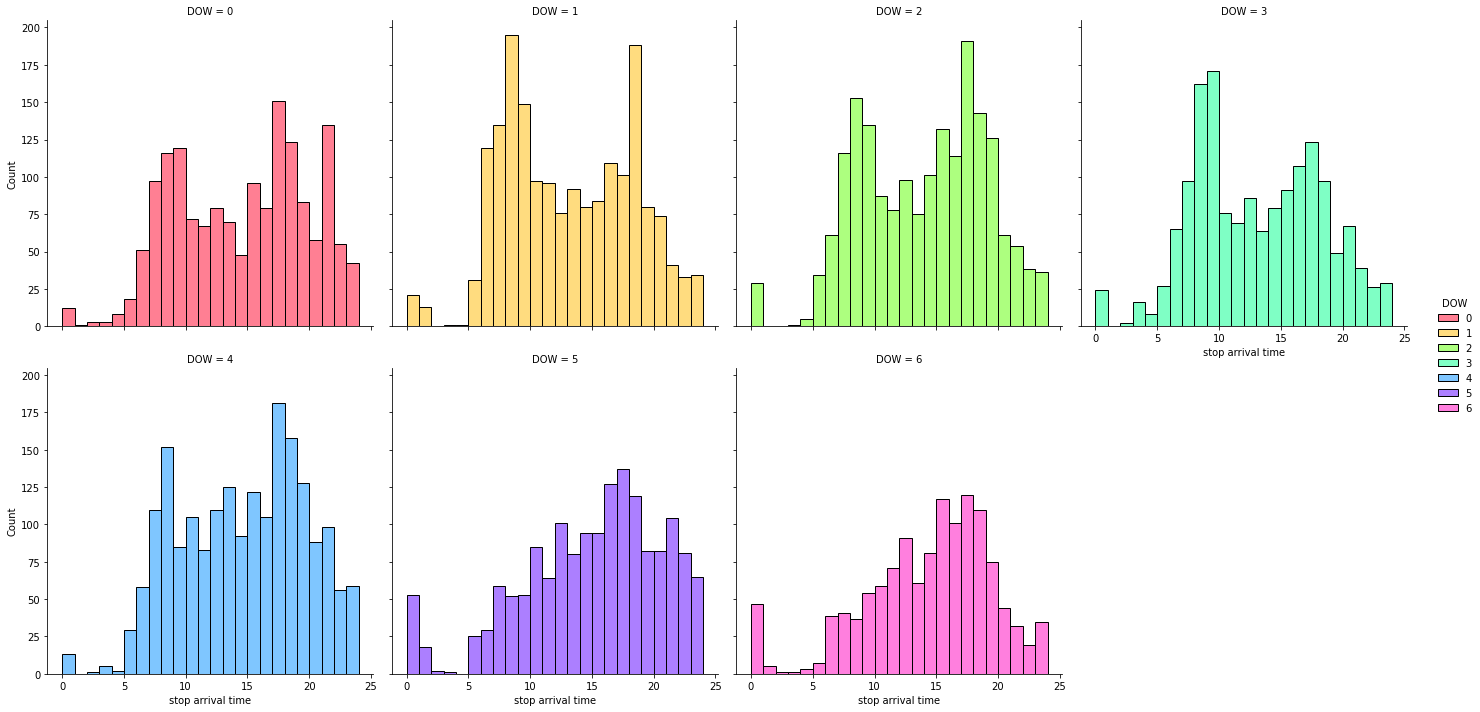

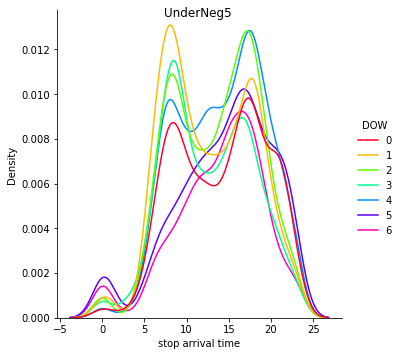

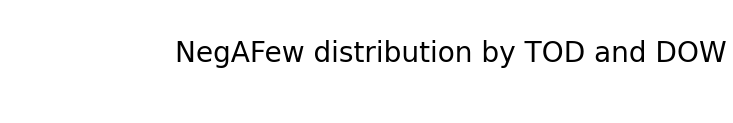

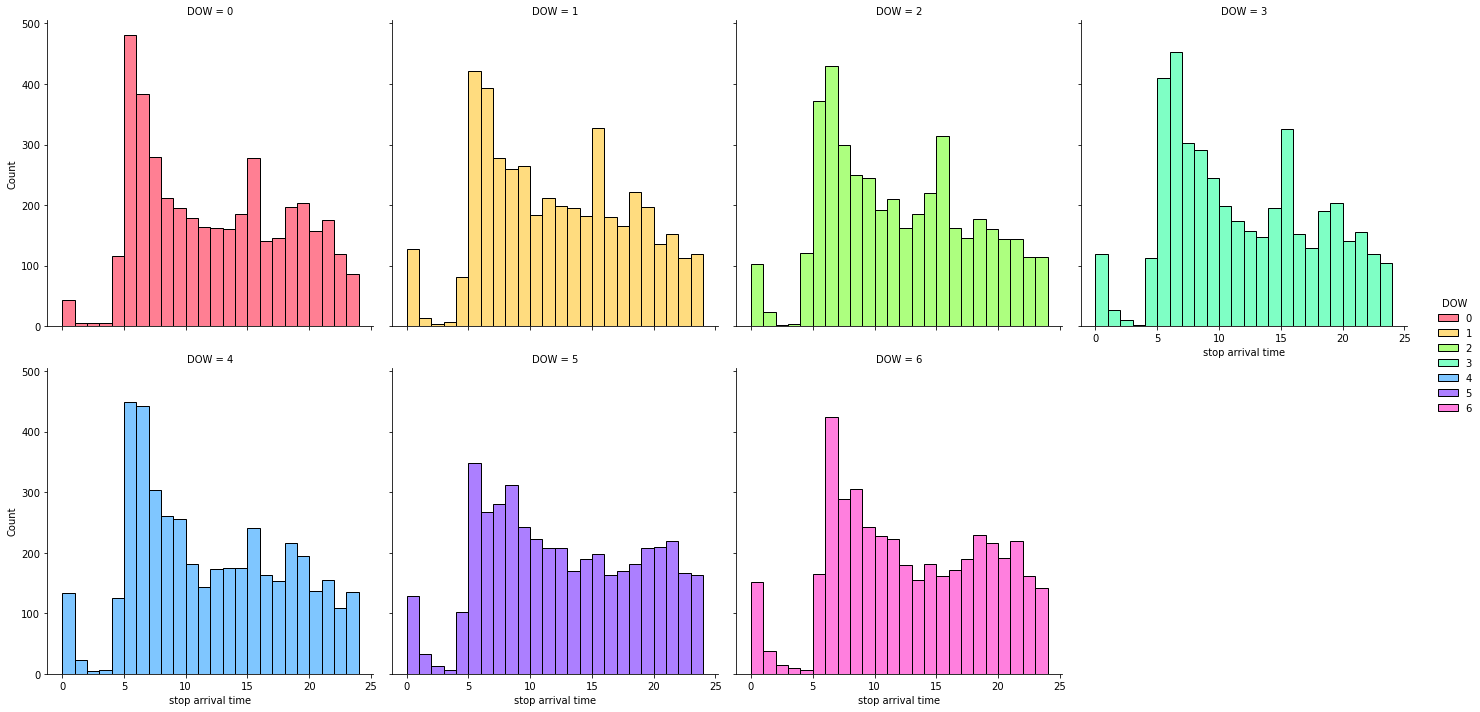

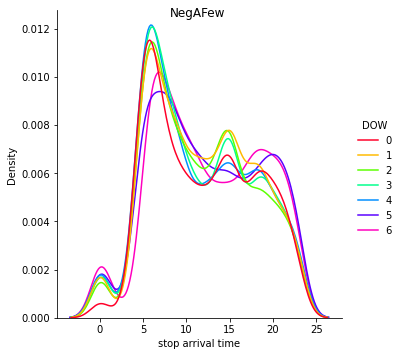

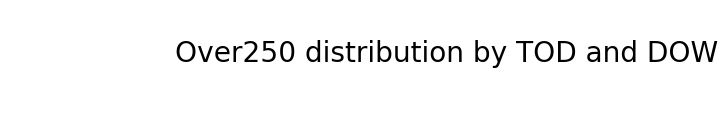

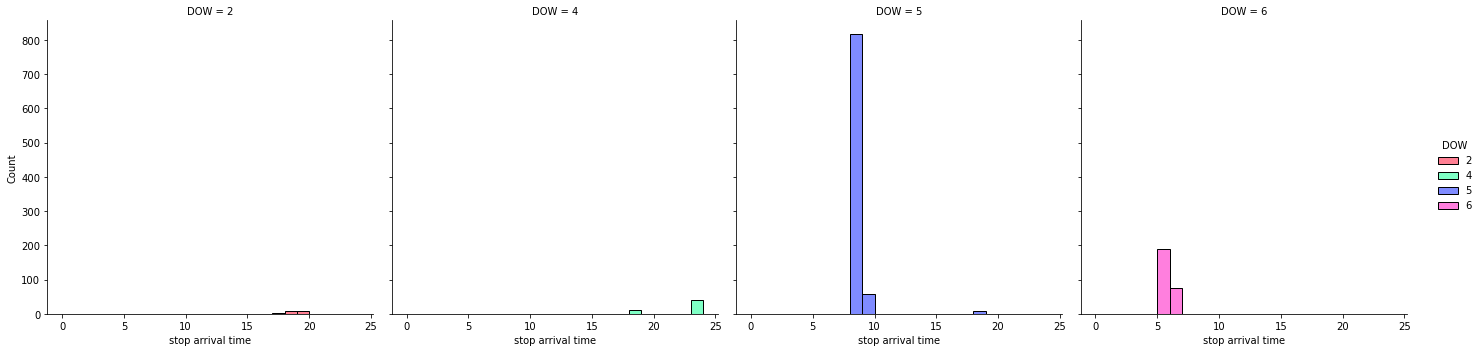

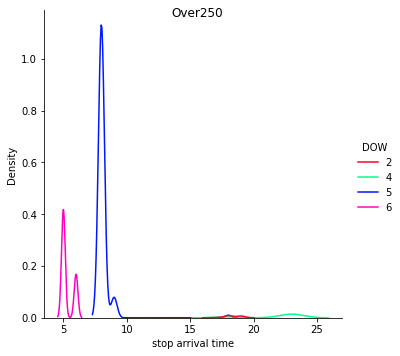

In [293]:
ofinterest = ['AllTrue','Crowded','Supercrowded','Capacity','UnderNeg5','NegAFew','Over250']

for col in ofinterest:
    plt.subplots(figsize=(6, 2))
    plt.text(0.5, 0.5, col+' distribution by TOD and DOW', fontsize=28)
    plt.axis('off')
    b = sns.displot(x=df.loc[df[col],'stop arrival time'].dt.hour, col=df.loc[df[col],'DOW'],
                binwidth=1, binrange=[0,24], hue=df.loc[df[col],'DOW'], palette='gist_rainbow', col_wrap=4)
    c = sns.displot(x=df.loc[df[col],'stop arrival time'].dt.hour, hue=df.loc[df[col],'DOW'],
                kind='kde', palette='gist_rainbow').fig.suptitle(col)

### By WOY by DOW

C:\Users\August\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
C:\Users\August\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


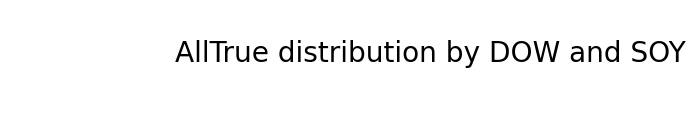

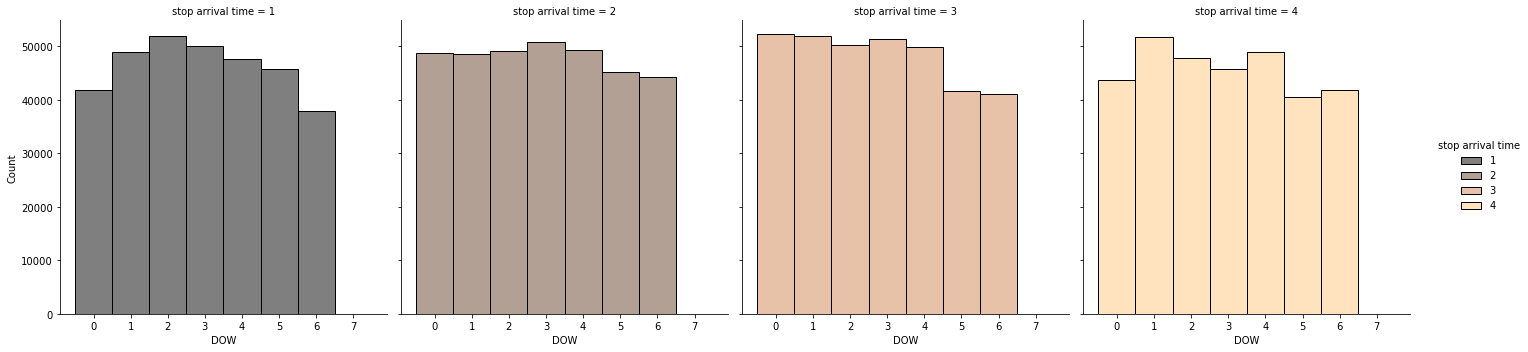

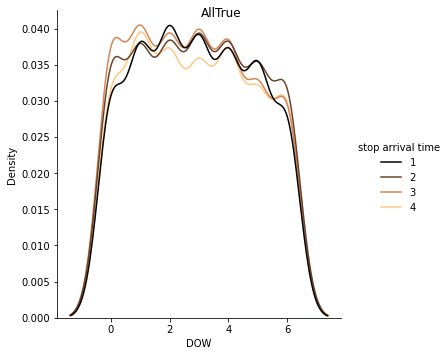

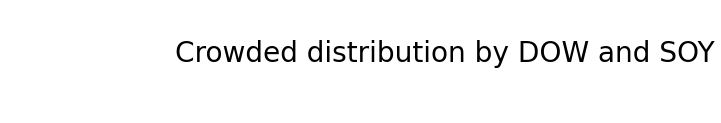

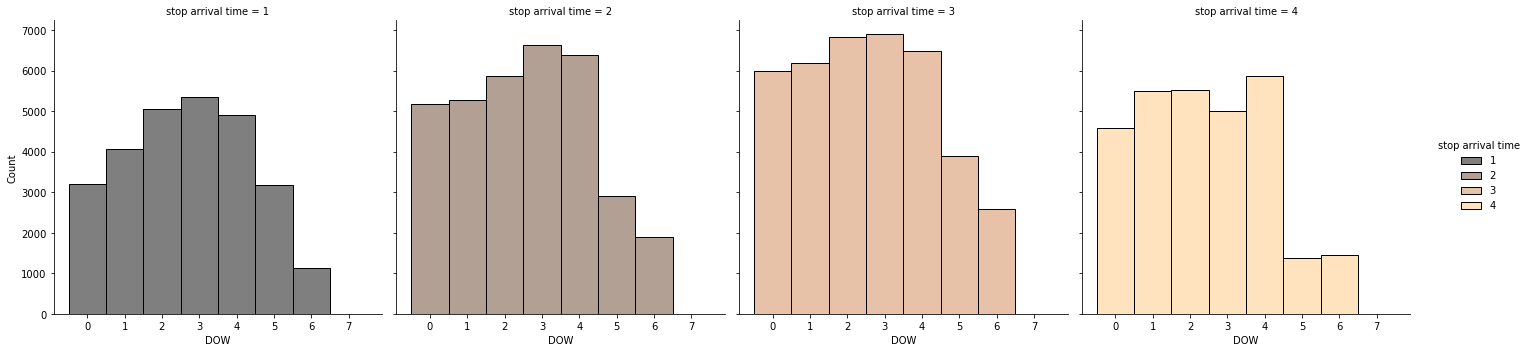

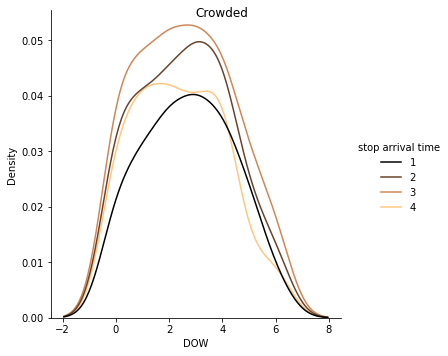

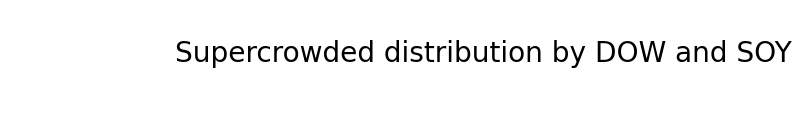

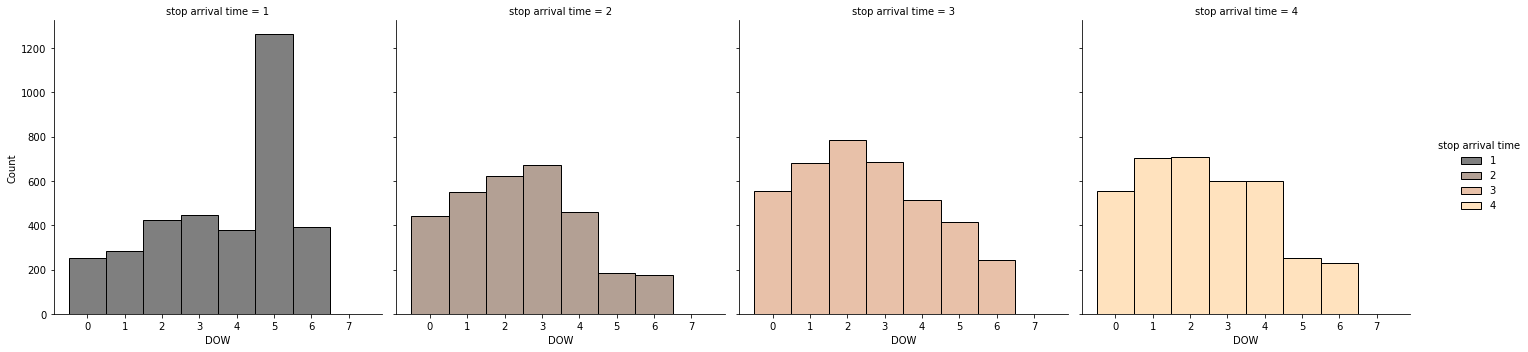

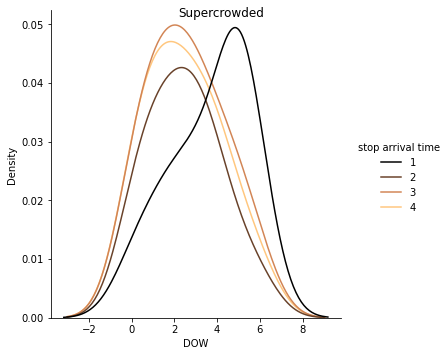

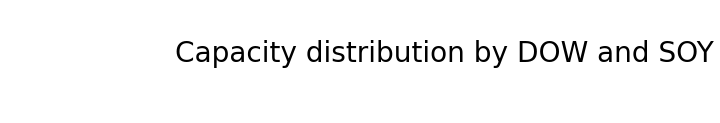

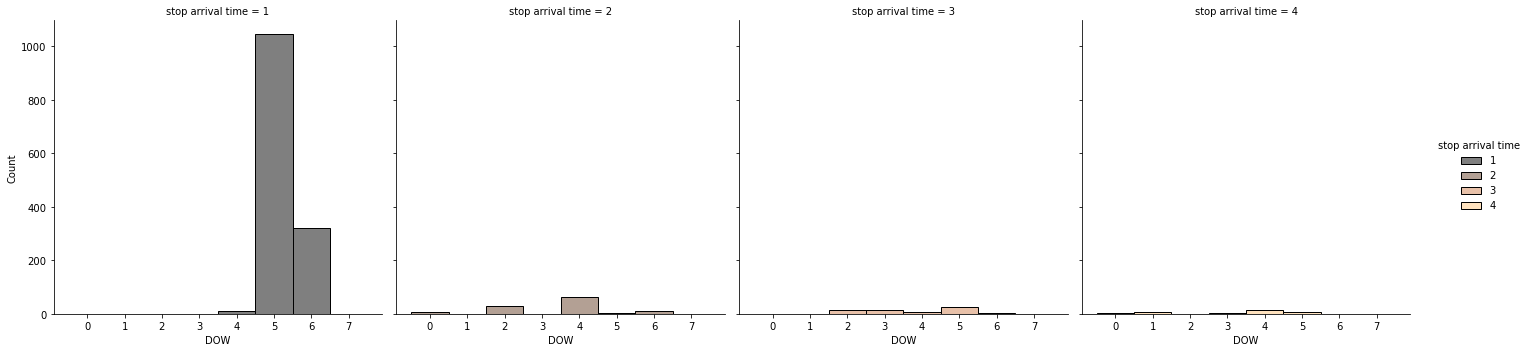

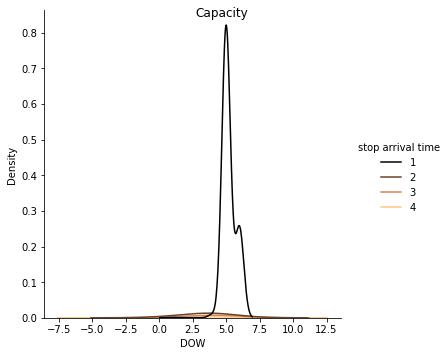

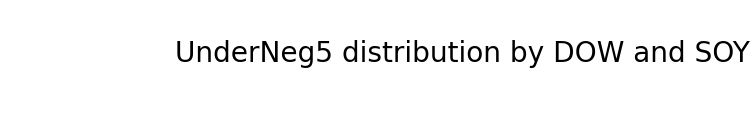

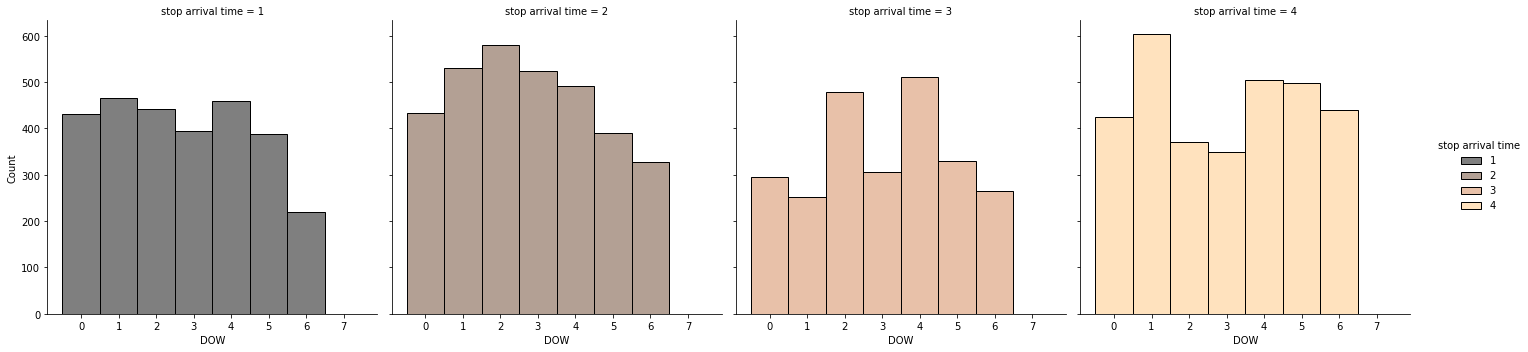

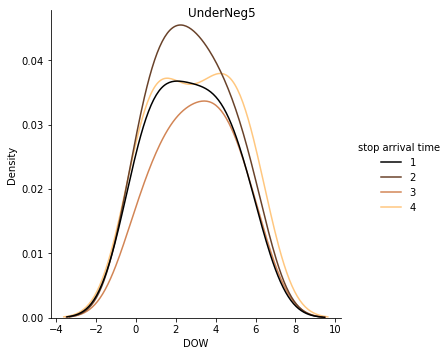

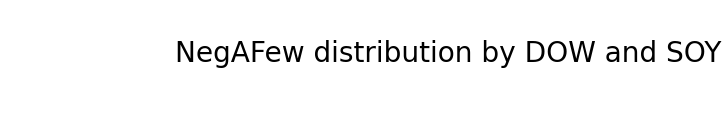

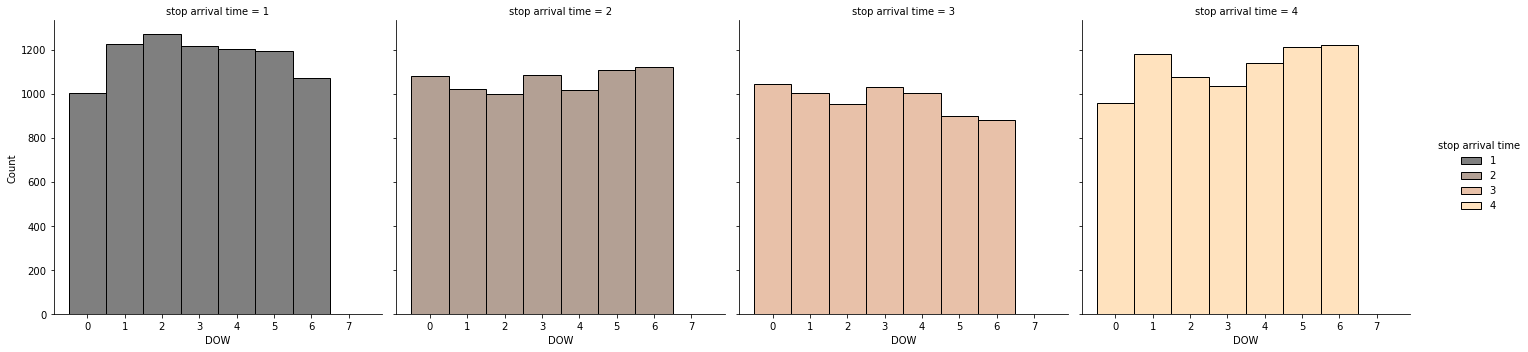

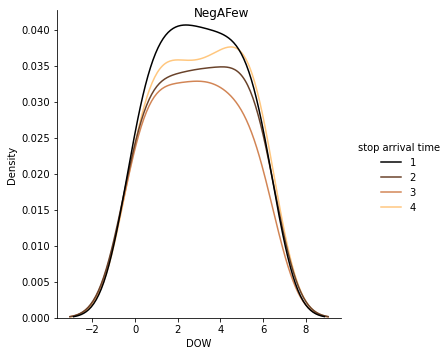

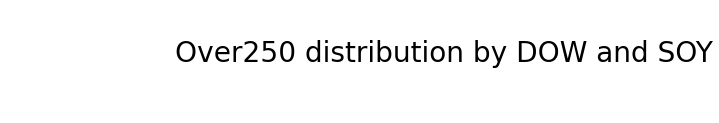

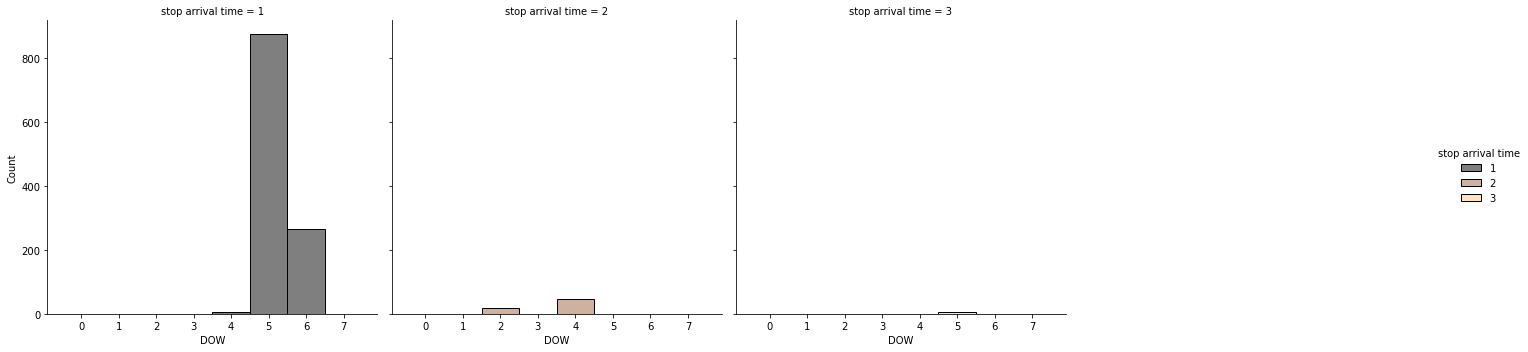

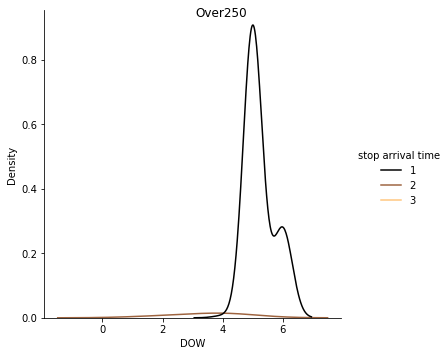

In [305]:
ofinterest = ['AllTrue','Crowded','Supercrowded','Capacity','UnderNeg5','NegAFew','Over250']

for col in ofinterest:
    plt.subplots(figsize=(6, 2))
    plt.text(0.5, 0.5, col+' distribution by DOW and SOY', fontsize=28)
    plt.axis('off')
    b = sns.displot(x=df.loc[df[col],'DOW'], col=df.loc[df[col],'stop arrival time'].dt.quarter,
                    binwidth=1, binrange=[0,7], hue=df.loc[df[col],'stop arrival time'].dt.quarter,
                    discrete=True,
                    #alpha = df.loc[df[col],'stop arrival time'].dt.quarter,
                    #palette='gist_rainbow',
                    palette = 'copper',
                    col_wrap=4)
    c = sns.displot(x=df.loc[df[col],'DOW'], hue=df.loc[df[col],'stop arrival time'].dt.quarter,
                    #alpha = df.loc[df[col],'stop arrival time'].dt.quarter,
                    kind='kde', bw_adjust = 3,
                    palette='copper').fig.suptitle(col)

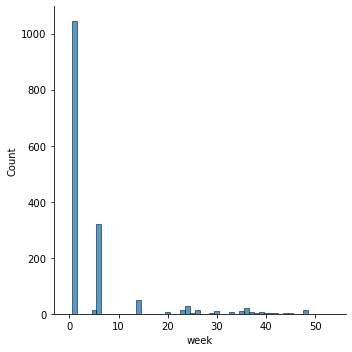

In [309]:
col = 'Capacity'
sns.displot(x=df.loc[df[col],'stop arrival time'].dt.isocalendar().week,
                    binwidth=1, binrange=[0,53],
                    discrete=True,
                    #alpha = df.loc[df[col],'stop arrival time'].dt.quarter,
                    #palette='gist_rainbow',
                    #palette = 'copper',
                    #col_wrap=4
           )

In [328]:
# find out when all these capacity-crowd observations happened
answer = df.loc[df['Capacity'],:].groupby(pd.Grouper(key='stop arrival time',
                                            freq='D')).count().sort_values(by='railcar ID').tail(10)
answer

,railcar ID,passboarding,passexiting,passwithin,routedone,route finish time,route start time,station name,next station,Crowded,Supercrowded,Capacity,UnderNeg5,NegAFew,Over250,TOD,DOW,DOW_name,Date,AllTrue
stop arrival time,,,,,,,,,,,,,,,,,,,,
2019-09-05,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2019-06-07,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2019-06-30,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2019-02-01,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2019-09-07,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2019-11-29,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2019-06-12,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
2019-04-05,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
2019-02-10,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321


Aha! Jan 5 and Feb 10

df.info()

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319102 entries, 0 to 1319101
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   railcar ID         1319102 non-null  int64         
 1   passboarding       1319102 non-null  int64         
 2   passexiting        1319102 non-null  int64         
 3   passwithin         1319102 non-null  int64         
 4   routedone          1319102 non-null  int64         
 5   route finish time  1319102 non-null  datetime64[ns]
 6   route start time   1319102 non-null  datetime64[ns]
 7   stop arrival time  1319102 non-null  datetime64[ns]
 8   station name       1319102 non-null  object        
 9   next station       1319102 non-null  object        
 10  Crowded            1319102 non-null  bool          
 11  Supercrowded       1319102 non-null  bool          
 12  Capacity           1319102 non-null  bool          
 13  UnderNeg5          1319102 

In [341]:
#df['railcar ID']==101
df['Capacity']

0          False
1          False
2          False
3          False
4          False
           ...  
1319097    False
1319098    False
1319099    False
1319100    False
1319101    False
Name: Capacity, Length: 1319102, dtype: bool

In [345]:
examples = df.loc[(df['Capacity']) & (df['railcar ID']==101),:].head(30)
examples

,railcar ID,passboarding,passexiting,passwithin,routedone,route finish time,route start time,stop arrival time,station name,next station,...,Supercrowded,Capacity,UnderNeg5,NegAFew,Over250,TOD,DOW,DOW_name,Date,AllTrue
148236,101,3,0,500,32771039,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148237,101,3,0,486,32751444,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148238,101,3,0,423,32602003,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148239,101,3,0,430,32614103,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148240,101,3,0,416,32588397,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148241,101,3,0,458,32685489,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148242,101,3,0,444,32648278,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148243,101,3,0,437,32635568,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148244,101,3,0,409,32570609,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True
148245,101,3,0,388,32537949,2019-02-10 06:09:13,2018-12-27 15:42:28,2019-02-10 05:44:31,Beacon,Baker,...,True,True,False,False,True,05:44:31,6,<bound method PandasDelegate._add_delegate_acc...,2019-02-10,True


In [332]:
answer2 = df.loc[df['Capacity'],:].groupby(['railcar ID','station name']).count().sort_values(by='passboarding').tail(30)
answer2

passboarding  passexiting  passwithin  routedone  \
railcar ID station name                                                      
141        Capitol Hill              4            4           4          4   
102        Beacon                    4            4           4          4   
           SODO                      5            5           5          5   
108        Pioneer                   5            5           5          5   
           UW                       12           12          12         12   
           Westlake                 13           13          13         13   
           Capitol Hill             14           14          14         14   
           University               15           15          15         15   
101        Beacon                   45           45          45         45   
           Baker                    46           46          46         46   
           Columbia                 46           46          46         46   
           Othello                  46           46          46         46   
           Rainier                  46           46          46         46   
           SeaTac                   46           46          46         46   
           Tukwila                  46           46          46         46   
110        SeaTac                   69           69          69         69   
           Westlake                 69           69          69         69   
           Baker                    70           70          70         70   
           Capitol Hill             70           70          70         70   
           University               70           70          70         70   
           Othello                  70           70          70         70   
           Rainier                  70           70          70         70   
           Stadium                  70           70          70         70   
           Tukwila                  70           70          70         70   
           UW                       70           70          70         70   
           Columbia                 70           70          70         70   
           Beacon                   71           71          71         71   
           Pioneer                  71           71          71         71   
           SODO                     71           71          71         71   
           Intl District            73           73          73         73   

                          route finish time  route start time  \
railcar ID station name                                         
141        Capitol Hill                   4                 4   
102        Beacon                         4                 4   
           SODO                           5                 5   
108        Pioneer                        5                 5   
           UW                            12                12   
           Westlake                      13                13   
           Capitol Hill                  14                14   
           University                    15                15   
101        Beacon                        45                45   
           Baker                         46                46   
           Columbia                      46                46   
           Othello                       46                46   
           Rainier                       46                46   
           SeaTac                        46                46   
           Tukwila                       46                46   
110        SeaTac                        69                69   
           Westlake                      69                69   
           Baker                         70                70   
           Capitol Hill                  70                70   
           University                    70                70   
           Othello                       70                70   
           Rainier                

Troubleshoot this tomorrow. (Trying to get multiple kde plots, each for a different season

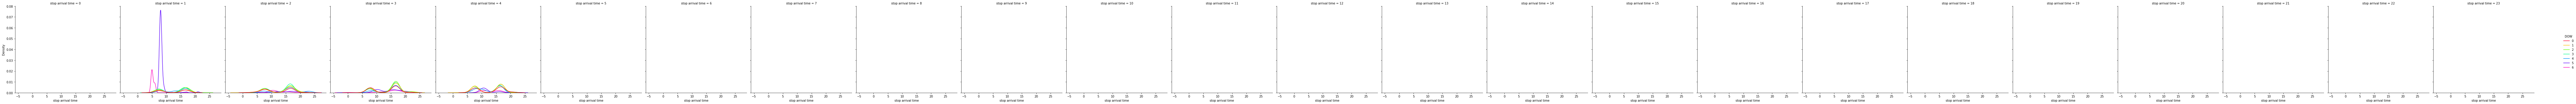

In [267]:
sns.displot(x=df.loc[df['Supercrowded'],'stop arrival time'].dt.hour, hue=df.loc[df['Supercrowded'],'DOW'],
            kind='kde', palette='gist_rainbow',
            col=df.loc[df['Supercrowded'],'stop arrival time'].dt.quarter)

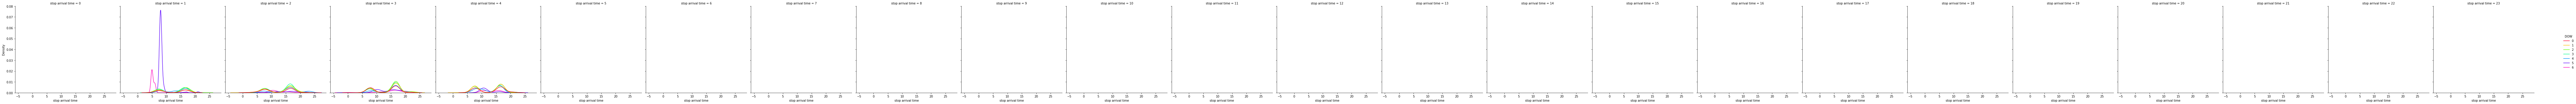

In [268]:
sns.displot(x=df.loc[df['Supercrowded'],'stop arrival time'].dt.hour, hue=df.loc[df['Supercrowded'],'DOW'],
            kind='kde', palette='gist_rainbow',cv
            col=df.loc[df['Supercrowded'],'stop arrival time'].dt.quarter)

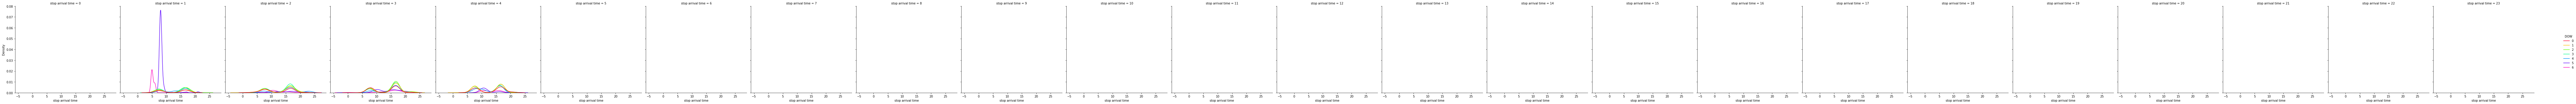

In [268]:
sns.displot(x=df.loc[df['Supercrowded'],'stop arrival time'].dt.hour, hue=df.loc[df['Supercrowded'],'DOW'],
            kind='kde', palette='gist_rainbow',cv
            col=df.loc[df['Supercrowded'],'stop arrival time'].dt.quarter)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

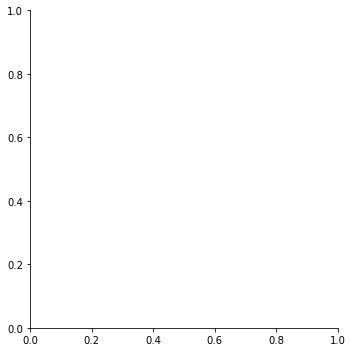

In [218]:
sns.displot(df, x='DOW', y='Crowded')

In [230]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 933807 to 203745
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   railcar ID         10000 non-null  int64         
 1   passboarding       10000 non-null  int64         
 2   passexiting        10000 non-null  int64         
 3   passwithin         10000 non-null  int64         
 4   routedone          10000 non-null  int64         
 5   route finish time  10000 non-null  datetime64[ns]
 6   route start time   10000 non-null  datetime64[ns]
 7   stop arrival time  10000 non-null  datetime64[ns]
 8   station name       10000 non-null  object        
 9   next station       10000 non-null  object        
 10  Crowded            10000 non-null  bool          
 11  Supercrowded       10000 non-null  bool          
 12  Capacity           10000 non-null  bool          
 13  UnderNeg5          10000 non-null  bool          
 14  

In [205]:
# Use seaborn
# crowded by DOW
sns.displot(df, x='TOD', y='')

,railcar ID,passboarding,passexiting,passwithin,routedone,route finish time,route start time,stop arrival time,station name,next station,Crowded,Supercrowded,Capacity,UnderNeg5,NegAFew,Over250,TOD,DOW,DOW_name,Date
0,137,0,0,21,31192044,2019-01-01 00:31:57,2018-12-31 23:27:08,2019-01-01 00:00:03,SODO,Stadium,False,False,False,False,False,False,00:00:03,1,<bound method PandasDelegate._add_delegate_acc...,2019-01-01
1,138,0,0,24,31197677,2019-01-01 00:41:41,2018-12-31 23:42:14,2019-01-01 00:01:22,Othello,Columbia,False,False,False,False,False,False,00:01:22,1,<bound method PandasDelegate._add_delegate_acc...,2019-01-01
2,104,2,1,28,31194379,2019-01-01 00:41:41,2018-12-31 23:42:14,2019-01-01 00:01:24,Othello,Columbia,False,False,False,False,False,False,00:01:24,1,<bound method PandasDelegate._add_delegate_acc...,2019-01-01
3,142,2,0,11,31207045,2019-01-01 00:43:42,2018-12-31 23:48:08,2019-01-01 00:01:40,Intl District,Stadium,False,False,False,False,False,False,00:01:40,1,<bound method PandasDelegate._add_delegate_acc...,2019-01-01
4,109,0,2,14,31190894,2019-01-01 00:43:45,2018-12-31 23:48:11,2019-01-01 00:01:43,Intl District,Stadium,False,False,False,False,False,False,00:01:43,1,<bound method PandasDelegate._add_delegate_acc...,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319097,105,0,6,22,36414055,2020-01-01 00:18:45,2019-12-31 23:13:08,2019-12-31 23:55:51,Westlake,Capitol Hill,False,False,False,False,False,False,23:55:51,1,<bound method PandasDelegate._add_delegate_acc...,2019-12-31
1319098,102,0,1,14,36409160,2020-01-01 00:36:57,2019-12-31 23:34:01,2019-12-31 23:56:09,Baker,Columbia,False,False,False,False,False,False,23:56:09,1,<bound method PandasDelegate._add_delegate_acc...,2019-12-31
1319099,105,0,6,16,36414055,2020-01-01 00:18:45,2019-12-31 23:13:08,2019-12-31 23:58:33,Capitol Hill,UW,False,False,False,False,False,False,23:58:33,1,<bound method PandasDelegate._add_delegate_acc...,2019-12-31
1319100,102,4,2,16,36409160,2020-01-01 00:36:57,2019-12-31 23:34:01,2019-12-31 23:59:07,Columbia,Othello,False,False,False,False,False,False,23:59:07,1,<bound method PandasDelegate._add_delegate_acc...,2019-12-31


Next steps:
 - Summarize my EDA findings for Prof. Bogden.
 - Remove the capacity situations that we think are either false or not representative of a usual situation
 - Set up a model to predict crowding by time by station, assuming we *don't* have real-time vehicle crowding information.

Model when we don't have real-time information:
 - User enters in a specific time, location, and direction of travel.
 - Output is "Crowded? yes/no" and "Supercrowded? yes/no"
   - gives riders an idea of what to expect - "Will I have to stand? Can I easily check my texts? Will my anxiety kick in?"
   
Is this going to be an improvement on what Google already does?
 - (even if it's redundant with Google, then mine might still be nice in the spirit of open-source)